**Модель прогнозирования популярности поста для Вк-сообщества "Bubble Comics"**


---



Проект был выполнен индивидуально в рамках курса по работе с данными на естественном языке

>
>

**Целью проекта** было создание модели, позволяющей предсказывать уровень возможной популярности поста в сообществе на основе анализа его текста. Популярность поста расчитывалась на основе **соотношения активности** (лайки, комментарии, репосты) **к общему количеству просмотров**

>
>

Работа проиводилась посредством работы с библиотеками **NLTK** и **Sklearn**

>
>

Результаты исследования оказались не совсем точными из-за особенностей публикаций выбранного паблика и сложностей с подбором подходящей модели  

## Собираем данные

Импортируем все необходимые библиотеки

In [ ]:
import requests

In [ ]:
import json
import pandas as pd
import time
import numpy as np
import warnings
warnings.simplefilter("ignore")

Получаем токен для дальнейшего сбора данных

In [ ]:
VK_TOKEN = 'vk1.a.9ulIImbFxaoCAwpy9x6ixDPi8JI2Il4mgcq9OF1lSp8D0qgEYLDU1xynzIZnHnsdLwkE-EyDCwrlDk055vUH5CPQRPaXBl3NLHmtsJeYbEefNRsoFXdiyXzue9RRUNE1UgC720UNi9xfSsu56cLny8GYNuTbVlD0fkaBlP6-g4kUesGqg6DfzpeZg-Pgu9GvmcEIWwawfbmTUeYNLnY2rg'

Создаем пустой датафрейм, куда будут записываться данные.

**Колонки датафрейма содержат:**

1. id сообщества
2. id поста
3. дату поста (в формате кодировки UTC)
4. описание видео, ссылки, изображения если есть
5. заголовок видео, ссылки, изображения если есть
6. текст поста
7. кол-во просмотров поста
8. кол-во лайков
9. кол-во репостов
10. кол-во комментариев

In [ ]:
data_posts = pd.DataFrame(columns = ['id_group', 'id_post', 'data', 'description', 'title', 'text', 'views', 'likes', 'reposts', 'comments'])

In [ ]:
#count_posts = wall_posts['response']['count']

c = 0
while c <= 18625:
    print(c)
    def get_wall_posts(VK_TOKEN: str) -> dict:
        url = 'https://api.vk.com/method/wall.get'
        params = {
            'access_token': VK_TOKEN,
            'owner_id': '-34202590',
            'v': '5.131',
            'offset': str(c),
            'count': 100
        }

        response = requests.get(url, params=params)
        return response.json()


    wall_posts = get_wall_posts(VK_TOKEN)

    j = len(data_posts)

    for i in range(len(wall_posts['response']['items'])):
        try:
            link = wall_posts['response']['items'][i]['attachments'][0]['link']
            description = link['description']
            title = link['title']
        except:
            try:
                video = wall_posts['response']['items'][i]['attachments'][0]['video']
                description = video['description']
                title = video['title']
            except:
                try:
                    photo = wall_posts['response']['items'][i]['attachments'][0]['photo']
                    description = photo['description']
                    title = photo['title']
                except:
                    description, title = np.nan,np.nan

        if wall_posts['response']['items'][i]['id'] in list(data_posts['id_post']):
            index = data_posts[data_posts['id_post'] == wall_posts['response']['items'][i]['id']].index[0]
            try:
                views =  wall_posts['response']['items'][i]['views']['count']
            except:
                views = np.nan
            data_posts.loc[index] = [wall_posts['response']['items'][i]['owner_id'],
                                    wall_posts['response']['items'][i]['id'],
                                    wall_posts['response']['items'][i]['date'],
                                    description,
                                    title,
                                    wall_posts['response']['items'][i]['text'],
                                    views,
                                    wall_posts['response']['items'][i]['likes']['count'],
                                    wall_posts['response']['items'][i]['reposts']['count'],
                                    wall_posts['response']['items'][i]['comments']['count']
                                    ]

        else:
            try:
                views =  wall_posts['response']['items'][i]['views']['count']
            except:
                views = np.nan
            data_posts.loc[j] = [wall_posts['response']['items'][i]['owner_id'],
                                    wall_posts['response']['items'][i]['id'],
                                    wall_posts['response']['items'][i]['date'],
                                    description,
                                    title,
                                    wall_posts['response']['items'][i]['text'],
                                    views,
                                    wall_posts['response']['items'][i]['likes']['count'],
                                    wall_posts['response']['items'][i]['reposts']['count'],
                                    wall_posts['response']['items'][i]['comments']['count']
                                    ]
            j += 1

    c += 100
    time.sleep(1)

**Итоговый датафрейм**

In [ ]:
data_posts

,id_group,id_post,data,description,title,text,views,likes,reposts,comments
0,-34202590,478375,1711803604,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31
1,-34202590,479820,1713265161,NaN,NaN,,3914.0,170,37,11
2,-34202590,479817,1713258001,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2
3,-34202590,479811,1713247201,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1
4,-34202590,479794,1713193203,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3
...,...,...,...,...,...,...,...,...,...,...
18617,-34202590,8,1328083568,NaN,NaN,"С такой погодой, как на улице сейчас, я тоже б...",NaN,22,2,1
18618,-34202590,7,1328018156,NaN,NaN,Фитнесс со Стасом Михайловым»: Приседания с от...,NaN,13,2,0
18619,-34202590,5,1328005592,NaN,NaN,"Американец Коди трогает все то, что, в чем, по...",NaN,28,4,1
18620,-34202590,4,1327995771,NaN,NaN,"Нет ничего лучше, чем начать новый день с чаше...",NaN,52,13,1


## Первичный анализ и обработка полученных данных

Анализ данных, представленных в таблице: размер, кол-во данных, тип данных

In [ ]:
data_posts.head()

,id_group,id_post,data,description,title,text,views,likes,reposts,comments
0,-34202590,478375,1711803604,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31
1,-34202590,479820,1713265161,NaN,NaN,,3914.0,170,37,11
2,-34202590,479817,1713258001,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2
3,-34202590,479811,1713247201,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1
4,-34202590,479794,1713193203,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3


In [ ]:
print(f'Количество публикаций в сообществе: {data_posts.shape[0]}\nКоличество категорий анализа: {data_posts.shape[1]}')

Количество публикаций в сообществе: 18622
Количество категорий анализа: 10


In [ ]:
data_posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18622 entries, 0 to 18621
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_group     18622 non-null  int64  
 1   id_post      18622 non-null  int64  
 2   data         18622 non-null  int64  
 3   description  1444 non-null   object 
 4   title        1444 non-null   object 
 5   text         18622 non-null  object 
 6   views        13066 non-null  float64
 7   likes        18622 non-null  int64  
 8   reposts      18622 non-null  int64  
 9   comments     18622 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.6+ MB


Данные:

1. **id_group** - id самого паблика Bubble (целое числовое значение)
2. **id_post** - id конкретной публикации (целое числовое значение)
3. **data** - дата публикации поста в формате кодировки UTC (целое числовое значение)
4. **description** - описание видео, ссылки, изображения если есть (строковое значение)
5. **title** - заголовок видео, ссылки, изображения если есть (строковое значение)
6. **text** - текст поста (строковое значение)
7. **views** - кол-во просмотров поста (дробное числовое значение)
8. **likes** - кол-во лайков (целое числовое значение)
9. **reposts** - кол-во репостов (целое числовое значение)
10. **comments** - кол-во комментариев (целое числовое значение)




---


**Удаление и преобразование колонок**

Так как все данные были собраны из одного сообщества и имеют свой уникальный индекс в датафрейме, мы можем удалить первые две колонки

In [ ]:
data_posts_2 = data_posts.drop(['id_group', 'id_post'], axis=1)

data_posts_2.head()

,data,description,title,text,views,likes,reposts,comments
0,1711803604,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31
1,1713265161,NaN,NaN,,3914.0,170,37,11
2,1713258001,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2
3,1713247201,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1
4,1713193203,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3


Мне захотелось оставить колонку с датой публикации, чтобы можно было просмотреть статистику по ней, но для этого надо было преобразовать ее в читаемый формат

In [ ]:
import datetime
from datetime import datetime

In [ ]:
data_posts_2['date'] = data_posts_2['data'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
data_posts_3 = data_posts_2.drop('data', axis=1)

data_posts_3.head()

,description,title,text,views,likes,reposts,comments,date
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31,2024-03-30 13:00:04
1,NaN,NaN,,3914.0,170,37,11,2024-04-16 10:59:21
2,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2,2024-04-16 09:00:01
3,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1,2024-04-16 06:00:01
4,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3,2024-04-15 15:00:03


In [ ]:
data_posts_3['year'] = data_posts_3['date'].apply(lambda x: x[0:4])
data_posts_3['month'] = data_posts_3['date'].apply(lambda x: x[5:7])
data_posts_3['day'] = data_posts_3['date'].apply(lambda x: x[8:10])
data_posts_3['hour'] = data_posts_3['date'].apply(lambda x: x[11:13])
data_posts_3['minute'] = data_posts_3['date'].apply(lambda x: x[14:16])
data_posts_3['second'] = data_posts_3['date'].apply(lambda x: x[-2:])

data_posts_3.head()

,description,title,text,views,likes,reposts,comments,date,year,month,day,hour,minute,second
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31,2024-03-30 13:00:04,2024,03,30,13,00,04
1,NaN,NaN,,3914.0,170,37,11,2024-04-16 10:59:21,2024,04,16,10,59,21
2,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2,2024-04-16 09:00:01,2024,04,16,09,00,01
3,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1,2024-04-16 06:00:01,2024,04,16,06,00,01
4,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3,2024-04-15 15:00:03,2024,04,15,15,00,03


In [ ]:
data_posts_3['len_text'] = data_posts_3['text'].apply(lambda x: int(len(x)) if pd.notnull(x) == True else np.NaN)

In [ ]:
data_posts_3.head()

,description,title,text,views,likes,reposts,comments,date,year,month,day,hour,minute,second,len_text
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31,2024-03-30 13:00:04,2024,03,30,13,00,04,178
1,NaN,NaN,,3914.0,170,37,11,2024-04-16 10:59:21,2024,04,16,10,59,21,0
2,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2,2024-04-16 09:00:01,2024,04,16,09,00,01,395
3,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1,2024-04-16 06:00:01,2024,04,16,06,00,01,99
4,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3,2024-04-15 15:00:03,2024,04,15,15,00,03,439


Заключительным этапом обработки датафрейма являлось удаление строк, длина которых была равна 0, то есть не содержала в себе текста. Также дополнительно проверяем, что информации нет в описании и заголовке

In [ ]:
data_posts_itog = data_posts_3[(data_posts_3['len_text'] != 0) | ((data_posts_3['len_text'] == 0) & (data_posts_3['description'].notna()) & (data_posts_3['title'].notna()))]
data_posts_itog

,description,title,text,views,likes,reposts,comments,date,year,month,day,hour,minute,second,len_text
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31,2024-03-30 13:00:04,2024,03,30,13,00,04,178
2,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2,2024-04-16 09:00:01,2024,04,16,09,00,01,395
3,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1,2024-04-16 06:00:01,2024,04,16,06,00,01,99
4,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3,2024-04-15 15:00:03,2024,04,15,15,00,03,439
5,NaN,NaN,⚡️ ИЗМЕНЕНИЯ В ГРАФИКЕ РАБОТЫ МАГАЗИНА ⚡️\n\nО...,5430.0,129,1,1,2024-04-15 13:00:02,2024,04,15,13,00,02,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18617,NaN,NaN,"С такой погодой, как на улице сейчас, я тоже б...",NaN,22,2,1,2012-02-01 08:06:08,2012,02,01,08,06,08,92
18618,NaN,NaN,Фитнесс со Стасом Михайловым»: Приседания с от...,NaN,13,2,0,2012-01-31 13:55:56,2012,01,31,13,55,56,139
18619,NaN,NaN,"Американец Коди трогает все то, что, в чем, по...",NaN,28,4,1,2012-01-31 10:26:32,2012,01,31,10,26,32,144
18620,NaN,NaN,"Нет ничего лучше, чем начать новый день с чаше...",NaN,52,13,1,2012-01-31 07:42:51,2012,01,31,07,42,51,123


## Популярность поста

Перед тем как начать подсчет популярности требуется определиться с тем, как она будет считаться

Наиболее используемая и "правильная" формула коэффициента вовлеченности требует для рассчетов также количество подписчиков на момент публикации поста, что не подходит для собранных данных

**Вовлеченность по просмотрам (Engagement rate by views)**

> ER view = (Сумма вовлечений у поста)/(Кол-во просмотров)*100%, где:


*   Сумма вовлечений у поста = кол-во лайков + кол-во репостов + кол-во комментариев





In [ ]:
data_posts_itog.head()

,description,title,text,views,likes,reposts,comments,date,year,month,day,hour,minute,second,len_text
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31,2024-03-30 13:00:04,2024,03,30,13,00,04,178
2,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2,2024-04-16 09:00:01,2024,04,16,09,00,01,395
3,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1,2024-04-16 06:00:01,2024,04,16,06,00,01,99
4,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3,2024-04-15 15:00:03,2024,04,15,15,00,03,439
5,NaN,NaN,⚡️ ИЗМЕНЕНИЯ В ГРАФИКЕ РАБОТЫ МАГАЗИНА ⚡️\n\nО...,5430.0,129,1,1,2024-04-15 13:00:02,2024,04,15,13,00,02,224


In [ ]:
data_posts_itog['popularity'] = round(((data_posts_itog['likes'] + data_posts_itog['reposts'] + data_posts_itog['comments'])/data_posts_itog['views'])*100, 2)

data_posts_itog

,description,title,text,views,likes,reposts,comments,date,year,month,day,hour,minute,second,len_text,popularity
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31,2024-03-30 13:00:04,2024,03,30,13,00,04,178,2.81
2,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2,2024-04-16 09:00:01,2024,04,16,09,00,01,395,3.37
3,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1,2024-04-16 06:00:01,2024,04,16,06,00,01,99,4.35
4,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3,2024-04-15 15:00:03,2024,04,15,15,00,03,439,3.18
5,NaN,NaN,⚡️ ИЗМЕНЕНИЯ В ГРАФИКЕ РАБОТЫ МАГАЗИНА ⚡️\n\nО...,5430.0,129,1,1,2024-04-15 13:00:02,2024,04,15,13,00,02,224,2.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18617,NaN,NaN,"С такой погодой, как на улице сейчас, я тоже б...",NaN,22,2,1,2012-02-01 08:06:08,2012,02,01,08,06,08,92,NaN
18618,NaN,NaN,Фитнесс со Стасом Михайловым»: Приседания с от...,NaN,13,2,0,2012-01-31 13:55:56,2012,01,31,13,55,56,139,NaN
18619,NaN,NaN,"Американец Коди трогает все то, что, в чем, по...",NaN,28,4,1,2012-01-31 10:26:32,2012,01,31,10,26,32,144,NaN
18620,NaN,NaN,"Нет ничего лучше, чем начать новый день с чаше...",NaN,52,13,1,2012-01-31 07:42:51,2012,01,31,07,42,51,123,NaN


В кругах маркетологов и SMM-специалистов принято считать нормой следующие значения ER:

*   **менее 1%** — плохой показатель;
*   **от 1% до 3,5%** — средний показатель;
*   **от 3,5% до 6%** — высокий показатель;
*   **свыше 6%** — очень высокий показатель.

Такая классификация позволит примерно определить показатель популярности поста по проведенным рассчетам

In [ ]:
data_posts_itog['popularity_class'] = pd.cut(data_posts_itog['popularity'], bins=[0, 1, 3.5, 6, 100], labels=['Плохой', 'Средний', 'Высокий','Очень высокий'])
data_posts_itog.head()

,description,title,text,views,likes,reposts,comments,date,year,month,day,hour,minute,second,len_text,popularity,popularity_class
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31,2024-03-30 13:00:04,2024,03,30,13,00,04,178,2.81,Средний
2,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2,2024-04-16 09:00:01,2024,04,16,09,00,01,395,3.37,Средний
3,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1,2024-04-16 06:00:01,2024,04,16,06,00,01,99,4.35,Высокий
4,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3,2024-04-15 15:00:03,2024,04,15,15,00,03,439,3.18,Средний
5,NaN,NaN,⚡️ ИЗМЕНЕНИЯ В ГРАФИКЕ РАБОТЫ МАГАЗИНА ⚡️\n\nО...,5430.0,129,1,1,2024-04-15 13:00:02,2024,04,15,13,00,02,224,2.41,Средний


## Анализ полученных значений

Проведем быстрый анализ значений с помощью метода **describe( )**

In [ ]:
data_posts_itog.describe()

,views,likes,reposts,comments,len_text,popularity
count,1.269500e+04,17720.000000,17720.000000,17720.000000,17720.000000,12695.000000
mean,1.529109e+04,376.076524,22.746050,23.005869,387.317099,3.338959
std,5.189018e+04,532.073184,98.142501,146.894748,324.343354,1.977785
min,3.625000e+03,2.000000,0.000000,0.000000,0.000000,0.030000
25%,8.578500e+03,105.000000,1.000000,4.000000,152.750000,2.000000
50%,1.085100e+04,217.000000,4.000000,10.000000,329.000000,2.830000
75%,1.527350e+04,425.000000,12.000000,23.000000,532.000000,4.130000
max,3.106011e+06,14954.000000,4172.000000,12542.000000,7936.000000,23.790000


In [ ]:
median_popularity = data_posts_itog['popularity'].median()
print(f'Медиана показателя популярности: {median_popularity}')

Медиана показателя популярности: 2.83


Из наиболее интересного для дальнейшего исследования увидим, что:

*   Наибольшая длина текста в публикации составляет почти 8 тысяч знаков

*   Максимальное значение популярности равно 23,7%, что является крайне высоким показателем
*   Сравнивая средний показатель популярности и ее медиану, заметно, что среднее значение выше, что может указывать на наличие особо больших значений популярности поста



## Предобработка текста

Создаем функцию предобработки:


*   Проверяю, что текст состоит из слов и чисел, исключаю тем самым смайлики и иные лишние символы
*   Также текст должен содержать только кириллические символы (это нужно, чтобы избавиться от внутритекстовых ссылок)



In [ ]:
def text_processing(text):
  punct = list(punctuation)
  text = word_tokenize(text)
  text = [i for i in text if(i not in punct)]
  text = [i for i in text if(i.isalnum() == True)]
  text = [i for i in text if(bool(re.search('[а-яА-Я0-9]', i)) == True)]
  text_itog = [i.lower() for i in text]

  return text_itog

Заранее записываю необходимый мне текст в список. Это нужно, так как в некоторых публикациях у меня отсутствует текст, но присутствуют описания и/или заголовки к медиа-наполнению

In [ ]:
list_text = []

for i in range(df.shape[0]):
  text = df['text'].iloc[i]
  if pd.isnull(text) == True:
    text = df['description'].iloc[i]
    if pd.isnull(text) == True:
      text = df['title'].iloc[i]

  list_text.append(text)

Предобрабатываю полученный список текстов и сохраняю его

In [ ]:
list_text_nltk = list(map(text_processing, list_text))

Прописываю функцию, которая принимает на вход список, начальный и заключительный индекс среза и лемматизирует полученный срез, после чего сохраняет полученный результат в список списков

In [ ]:
def checkExecTimeMystemOneText(texts, start, end):
    txtpart = texts[start:end]
    res = []
    for txtp in txtpart:
        alltexts = ' '.join([txt + ' br ' for txt in txtp])

        words = Mystem().lemmatize(alltexts)
        doc = []
        for txts in words:
          if txts != ' \n':
            if txts.strip() != '' and bool(re.search('[а-яА-Я0-9]', txts)) == True:
              doc.append(txts)
          else:
            res.append(doc)
            doc = []

    return res

Лемматизация собранных текстов

In [ ]:
start = 0
end = 1000
lem_stem = []

for cycle in tqdm(range(int(19)), desc='Progress'):
  lem_stem += checkExecTimeMystemOneText(list_text_nltk, start, end)
  start += 1000
  if cycle == 17:
    end = len(list_text_nltk)
  else:
    end += 1000

Progress:   0%|          | 0/19 [00:00<?, ?it/s]

В случае необходимости в дальнейшей части кода можно использовать список lem_stem, но я предварительно сохраняю его в датафрейм, чтобы не лемматизировать каждый раз слова заново

In [ ]:
with open('Новая таблица - Лист1.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    df_lemm_lists = pd.DataFrame(reader)

In [ ]:
df_lemm_lists.head()

,lem_stem
0,"['а', 'вот', 'и', 'расписание', 'электронный',..."
1,"['последний', 'день', 'предзаказ', 'напоминать..."
2,"['солнечный', 'димочка', 'с', 'утро', 'залог',..."
3,"['сегодня', 'свой', 'день', 'рождение', 'отмеч..."
4,"['изменение', 'в', 'график', 'работа', 'магази..."


При проверке длины изначального предобработанного списка текстов и итогового датафрейма с лемматизированными текстами, стало заметно, что куда-то пропали 148 наблюдений

In [ ]:
print(len(list_text_nltk))
print(df_lemm_lists.shape[0])

17720
17572


Проверяю какие строки по индексу и с какими значениями были пропущены. Заметно, что такие публикации в своих текстах содержат исключительно эмодзи и хештеги

In [ ]:
counter = {}

for i in range(len(list_text_nltk)):
  if len(list_text_nltk[i]) == 0:
    counter[i] = df.iloc[i]['text']

print(counter)

{861: '🔥🔥🔥', 2140: '😍', 2193: '❗️Важная информация❗️', 2293: 'Oh no...\n\n#bubblecomics', 2322: '🥰', 4641: '#bubblecomics #bubblestudios', 4822: '⚡⚡⚡', 4924: '🔥🔥🔥', 4956: '🌷🌷🌷', 5055: ';)', 5632: '👁️\xa0confirmed\n#bubblecomics', 5784: '#bubblecomics', 5909: '#bubblecomics #bubblestudios', 5989: 'Наш-то, наш-то!', 6569: '#bubblecomics', 6839: '🔥', 6849: '#bubblecomics', 6895: '#bubblecomics', 6929: '#bubblecomics #gradient', 6961: '👀👀👀', 6988: '#bubblecomics', 7357: '!!!', 8016: '#BubbleFace', 8227: '📗', 8302: 'tag yourself', 8332: '#bubblenight', 8336: '#bubblenight', 8340: '#bubblenight', 8661: 'same energy', 8754: '#bubblecomics\xa0#bubblememes', 8755: '#bubblecomics\xa0#bubblememes', 8777: '!!!', 8801: '#bubblecomics #bubblememes', 8859: 'Внезапно…\n\n#bubblecomics', 8860: '#bubblecomics', 8861: '#bubblecomics', 8862: '#bubblecomics', 8877: '!!!', 8902: '#bubblecomics', 8904: '#bubblecomics', 8905: '#bubblecomics', 8929: '#bubblecomics #bubblememes', 8954: '#bubblecomics', 8957: '#

Дополнительно проверяю какой класс популярности имеют неучтенные значения

In [ ]:
check_class = {}

for i in range(len(list_text_nltk)):
  if len(list_text_nltk[i]) == 0:
    if df.iloc[i]['popularity_class'] in check_class:
      check_class[df.iloc[i]['popularity_class']] += 1
    else:
      check_class[df.iloc[i]['popularity_class']] = 1

In [ ]:
check_class

{'Высокий': 29, 'Средний': 48, 'Очень высокий': 6, 'Плохой': 1, nan: 64}

Большинство значений имеют класс nan, что позволяет удалить эти данные из выборки публикаций

Создаю новый датафрейм, в котором исключаю неинформативные строки, после чего добавляю получившийся после лемматизации список списков как столбец в новом датафрейме

In [ ]:
df_lemm = df

for i in range(len(list_text_nltk)):
  if len(list_text_nltk[i]) == 0:
    df_lemm = df_lemm.drop(index = i)

df_lemm['lem_stem'] = df_lemm_lists['lem_stem'].tolist()
df_lemm['lem_stem'] = df_lemm['lem_stem'].apply(lambda x: x[2:-2].split("', '"))

In [ ]:
df_lemm.head()

,description,title,text,views,likes,reposts,comments,date,year,month,day,hour,minute,second,len_text,popularity,popularity_class,lem_stem
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31,2024-03-30 13:00:04,2024,3,30,13,0,4,178,2.81,Средний,"[а, вот, и, расписание, электронный, новинка, ..."
1,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2,2024-04-16 09:00:01,2024,4,16,9,0,1,395,3.37,Средний,"[последний, день, предзаказ, напоминать, все, ..."
2,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1,2024-04-16 06:00:01,2024,4,16,6,0,1,99,4.35,Высокий,"[солнечный, димочка, с, утро, залог, хороший, ..."
3,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3,2024-04-15 15:00:03,2024,4,15,15,0,3,439,3.18,Средний,"[сегодня, свой, день, рождение, отмечать, наш,..."
4,NaN,NaN,⚡️ ИЗМЕНЕНИЯ В ГРАФИКЕ РАБОТЫ МАГАЗИНА ⚡️\n\nО...,5430.0,129,1,1,2024-04-15 13:00:02,2024,4,15,13,0,2,224,2.41,Средний,"[изменение, в, график, работа, магазин, обраща..."


Следующим этапом обработки нового датафрейма будет удаление значений, имеющих NaN как класс популярности, так как эти данные не несут информативной пользы для исследования, а также корректно считаю длину текста по количеству слов

In [ ]:
df_lemm = df_lemm[pd.isnull(df_lemm['popularity_class']) == False]

In [ ]:
df_lemm['len_text'] = df_lemm['lem_stem'].apply(lambda x: len(x))

Заключительный этап - **исключение стоп-слов**

Использую наиболее полный список стоп-слов на русском, который мне удалось найти, а также дополняю его словами, которые были найдены вручную

In [ ]:
stoplist = []
with open('final_stop.txt', 'r') as word_stoplist_file:
  for line in word_stoplist_file:
    stoplist.append(line[:-1])

my_stopwords = ['который', 'точно', 'первый', 'второй', 'третий', 'несколько',
                'кстати', 'пусть', 'снова', 'почему', 'пора', 'вообще',
                'далеко', 'общий', 'итак', 'действительно', 'четвертый', 'лишь',
                'например', 'никто', 'особенно', 'четыре', 'давно', 'благодаря',
                'некоторый', 'ура', 'многий', 'твой', 'хотя', 'оно', 'оба',
                'сколько', 'восьмой', 'поздно', 'пять', 'чей', 'лучшедомо',
                'тут', 'невероятный', 'тогда', 'абсолютно', 'совершенно',
                'вперед', 'потом', 'рано', 'почти', 'иногда', 'быстро',
                'впервые', 'невероятно', 'нельзя', 'д', 'слишком', 'шестой',
                'весьма', 'невозможно', 'насколько', 'менее', 'легко', 'чего',
                'поистине', 'стр', 'вовсе', 'вполне', 'туда', 'вовсю', 'явно',
                'срочно', 'прочий', 'сюда', 'столь', 'прочее', 'нечто', 'затем',
                'ранее', 'х', 'см', 'некоторые', 'нигде', 'судя', 'особо',
                'зря', 'некогда', 'короче', 'двенадцатый', 'семнадцатый',
                'далее', 'лс', 'зы', 'желательно', 'нынче', 'сотый', 'эта',
                'некуда', 'ноль', 'неспроста', 'вдали', 'вниз', 'узреть',
                'предвкушать', 'толком', 'сложе', 'г', 'йо', 'тыкать']

for el in my_stopwords:
  if el not in stoplist:
    stoplist.append(el)

Избавляюсь от остатков некорретно оставленных слов:


*   Оставляю слово если оно не в списке стоп-слов
*   Оставляю слова состоящие из кириллицы
*   Удаляю слова содержащие bubble
*   Удаляю слова с латинскими буквами и цифрами, которые не были удалены на предыдущих этапах обработки, так как писались единой строкой



In [ ]:
df_lemm['lem_stem'] = [[word for word in my_list if word not in stoplist] for my_list in df_lemm['lem_stem']]
df_lemm['lem_stem'] = [[word for word in my_list if bool(re.search('[а-яА-Я]', word)) == True] for my_list in df_lemm['lem_stem']]
df_lemm['lem_stem'] = [[word for word in my_list if bool(re.search('bubble', word)) == False] for my_list in df_lemm['lem_stem']]
df_lemm['lem_stem'] = [[word for word in my_list if bool(re.search(r'[a-zA-Z0-9]+', word)) == False] for my_list in df_lemm['lem_stem']]

In [ ]:
df_lemm.head()

,description,title,text,views,likes,reposts,comments,date,year,month,day,hour,minute,second,len_text,popularity,popularity_class,lem_stem
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766.0,613,52,31,2024-03-30 13:00:04,2024,3,30,13,0,4,24,2.81,Средний,"[расписание, электронный, новинка, апрель, жда..."
1,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625.0,116,4,2,2024-04-16 09:00:01,2024,4,16,9,0,1,49,3.37,Средний,"[последний, день, предзаказ, напоминать, приоб..."
2,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968.0,292,10,1,2024-04-16 06:00:01,2024,4,16,6,0,1,16,4.35,Высокий,"[солнечный, димочка, утро, залог, хороший, ден..."
3,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378.0,168,0,3,2024-04-15 15:00:03,2024,4,15,15,0,3,52,3.18,Средний,"[сегодня, день, рождение, отмечать, прекрасный..."
4,NaN,NaN,⚡️ ИЗМЕНЕНИЯ В ГРАФИКЕ РАБОТЫ МАГАЗИНА ⚡️\n\nО...,5430.0,129,1,1,2024-04-15 13:00:02,2024,4,15,13,0,2,30,2.41,Средний,"[изменение, график, работа, магазин, обращать,..."


In [ ]:
df_lemm = pd.read_csv('Обработанные_тексты_Bubble.csv')
df_lemm['lem_stem'] = df_lemm['lem_stem'].apply(lambda x: x[2:-2].split("', '"))

## Статистический анализ

Для проведения статистического анализа следует сначала определить по каким данным его можно провести


1.   **Количество просмотров**: можно рассчитать все МЦТ
2.   **Количество лайков**: можно рассчитать все МЦТ
3.   **Количество репостов**: можно рассчитать все МЦТ
4.   **Количество комментариев**: можно рассчитать все МЦТ
5.   **Год, месяц, дата и время**: можно посмотреть моду
6.   **Популярность** (числовая): можно рассчитать все МЦТ
7.   **Популярность** (категориальная): можно посмотреть моду
8.   **Длина текста**: можно рассчитать все МЦТ

Так же можно сравнить показатели между длиной изначального текста и длиной сохраненных после обработки слов

In [ ]:
pink_color = '#ffc8bf'
green_color = '#6be0c1'
purple_color = '#886cc1'
orange_color = '#f4aa69'

tfont = dict(fontsize=20)
lfont = dict(fontsize=12)

**Количество просмотров**

In [ ]:
df_lemm.views = df_lemm.views.astype(int)

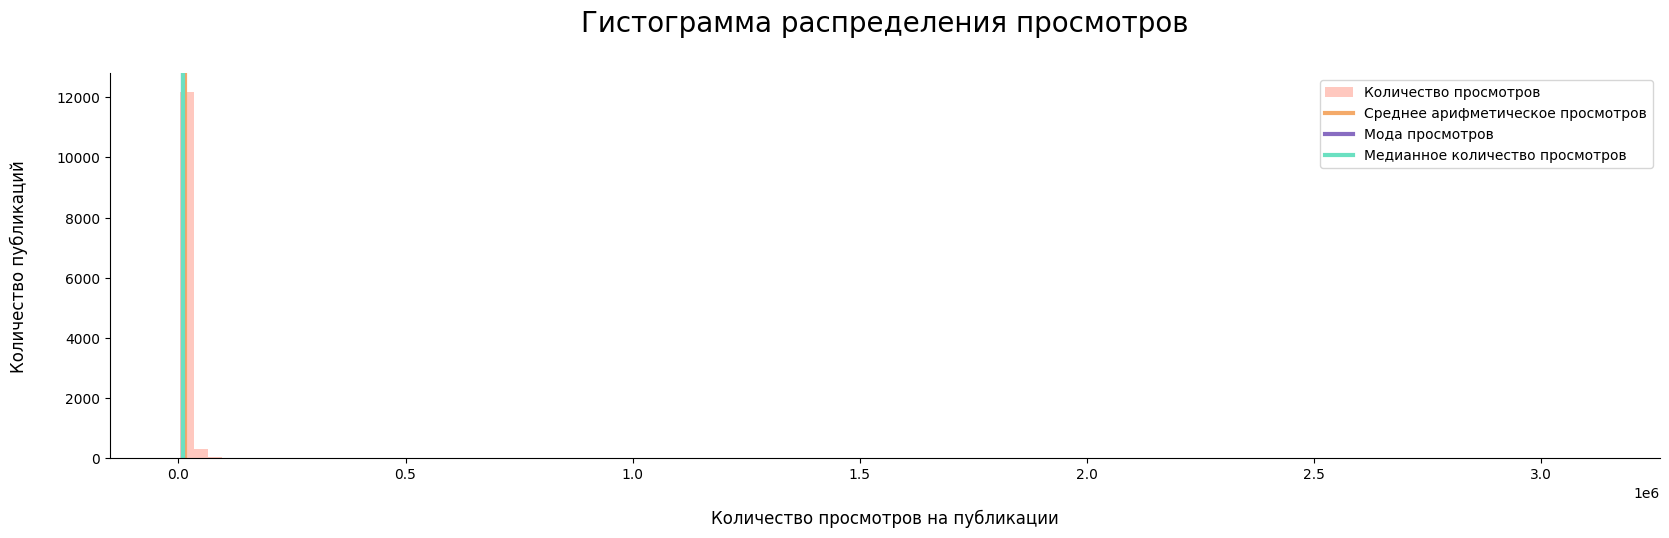

In [ ]:
fig1_data = df_lemm['views']

# создаем ось координат
fig1, axis1 = plt.subplots(figsize=(20, 5))

# строим гистограмму распределения
axis1.hist(fig1_data, color=pink_color, bins=100, label='Количество просмотров')

# названия осей
axis1.set_xlabel('Количество просмотров на публикации', **lfont, labelpad = 20)
axis1.set_ylabel('Количество публикаций', **lfont, labelpad = 20)

# среднее арифметическое
axis1.axvline(fig1_data.mean(), color = orange_color, label='Среднее арифметическое просмотров', linewidth=3)
# мода
axis1.axvline(fig1_data.mode()[0], color = purple_color, label='Мода просмотров', linewidth=3)
# медиана
axis1.axvline(fig1_data.median(), color = green_color, label='Медианное количество просмотров', linewidth=3)

# заголовок
axis1.set_title('Гистограмма распределения просмотров', **tfont, pad = 30)
# убираем правую и верхнюю границу графика
axis1.spines['top'].set_visible(False)
axis1.spines['right'].set_visible(False)

# легенда
axis1.legend();

In [ ]:
print(f'Минимальное количество просмотров: {fig1_data.min()}')
print(f'Максимальное количество просмотров: {fig1_data.max()}')
print(f'Среднеквадратичное отклонение: {round(fig1_data.std(), 2)}')

Минимальное количество просмотров: 3625
Максимальное количество просмотров: 3106011
Среднеквадратичное отклонение: 52053.89


Как видно на графике, наибольшее количество данных сосредоточено в самой левой части гистограммы. Максимальное и минимальное значение также указывают на наличие перевеса в данных в сторону более маленьких значений с учетом наличия крупных выбросов. Посмотрим как данные будут выглядеть без излишне больших значений

In [ ]:
up_std = fig1_data.mean() + 3*fig1_data.std()
low_std = fig1_data.mean() - 3*fig1_data.std()

fig1_2_data = df_lemm[(df_lemm['views'] >= up_std) | (df_lemm['views'] <= low_std)]['views']

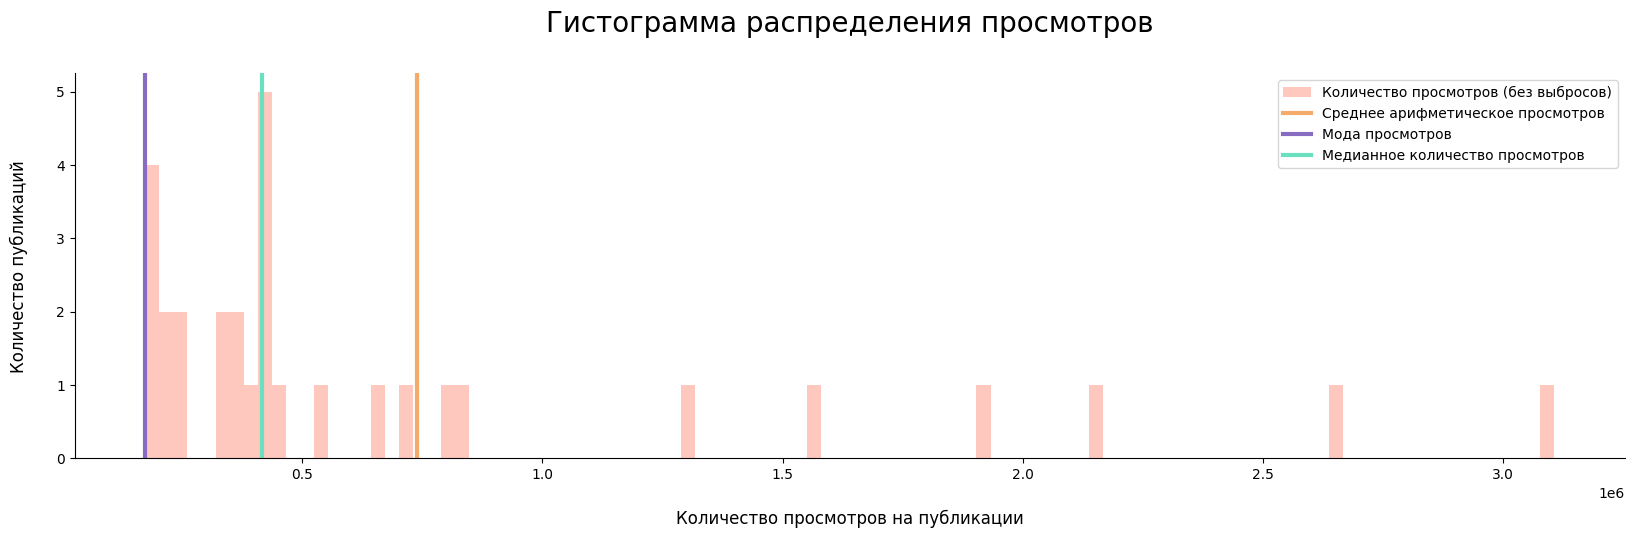

In [ ]:
fig1_2, axis1_2 = plt.subplots(figsize=(20, 5))

axis1_2.hist(fig1_2_data, color=pink_color, bins=100, label='Количество просмотров (без выбросов)')

axis1_2.set_xlabel('Количество просмотров на публикации', **lfont, labelpad = 20)
axis1_2.set_ylabel('Количество публикаций', **lfont, labelpad = 20)

axis1_2.axvline(fig1_2_data.mean(), color = orange_color, label='Среднее арифметическое просмотров', linewidth=3)
axis1_2.axvline(fig1_2_data.mode()[0], color = purple_color, label='Мода просмотров', linewidth=3)
axis1_2.axvline(fig1_2_data.median(), color = green_color, label='Медианное количество просмотров', linewidth=3)

axis1_2.set_title('Гистограмма распределения просмотров', **tfont, pad = 30)

axis1_2.spines['top'].set_visible(False)
axis1_2.spines['right'].set_visible(False)

# легенда
axis1_2.legend();

Даже на гистограмме уже без выбросов заметно скопление данных в левой стороне. Отношения показателя среднего и медианы также подтверждают, что несмотря на удаление выбросов по 3 среднеквадратичным отклонениям, крупные выбросы все равно остались

**Количество лайков**

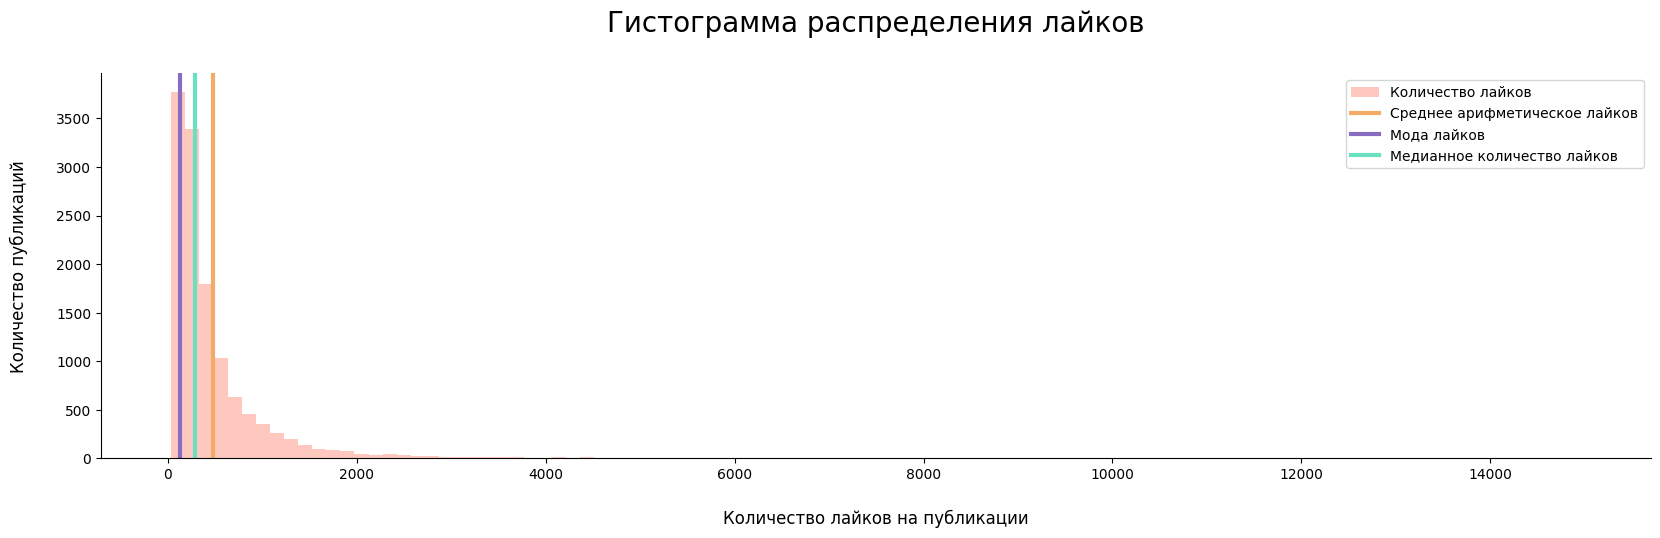

In [ ]:
fig2_data = df_lemm['likes']

fig2, axis2 = plt.subplots(figsize=(20, 5))

axis2.hist(fig2_data, color=pink_color, bins=100, label='Количество лайков')

axis2.set_xlabel('Количество лайков на публикации', **lfont, labelpad = 20)
axis2.set_ylabel('Количество публикаций', **lfont, labelpad = 20)

axis2.axvline(fig2_data.mean(), color = orange_color, label='Среднее арифметическое лайков', linewidth=3)
axis2.axvline(fig2_data.mode()[0], color = purple_color, label='Мода лайков', linewidth=3)
axis2.axvline(fig2_data.median(), color = green_color, label='Медианное количество лайков', linewidth=3)

axis2.set_title('Гистограмма распределения лайков', **tfont, pad = 30)

axis2.spines['top'].set_visible(False)
axis2.spines['right'].set_visible(False)

axis2.legend();

In [ ]:
print(f'Минимальное количество лайков: {fig2_data.min()}')
print(f'Максимальное количество лайков: {fig2_data.max()}')
print(f'Среднеквадратичное отклонение: {round(fig2_data.std(), 2)}')

Минимальное количество лайков: 36
Максимальное количество лайков: 14954
Среднеквадратичное отклонение: 585.91


Количество лайков на публикациях также имеют заметные выбросы в сторону больших значений (максимальное значение достигает почти 15 тысяч). При этом наиболее частовстречающееся количество лайков не превышает 200

**Количество репостов**

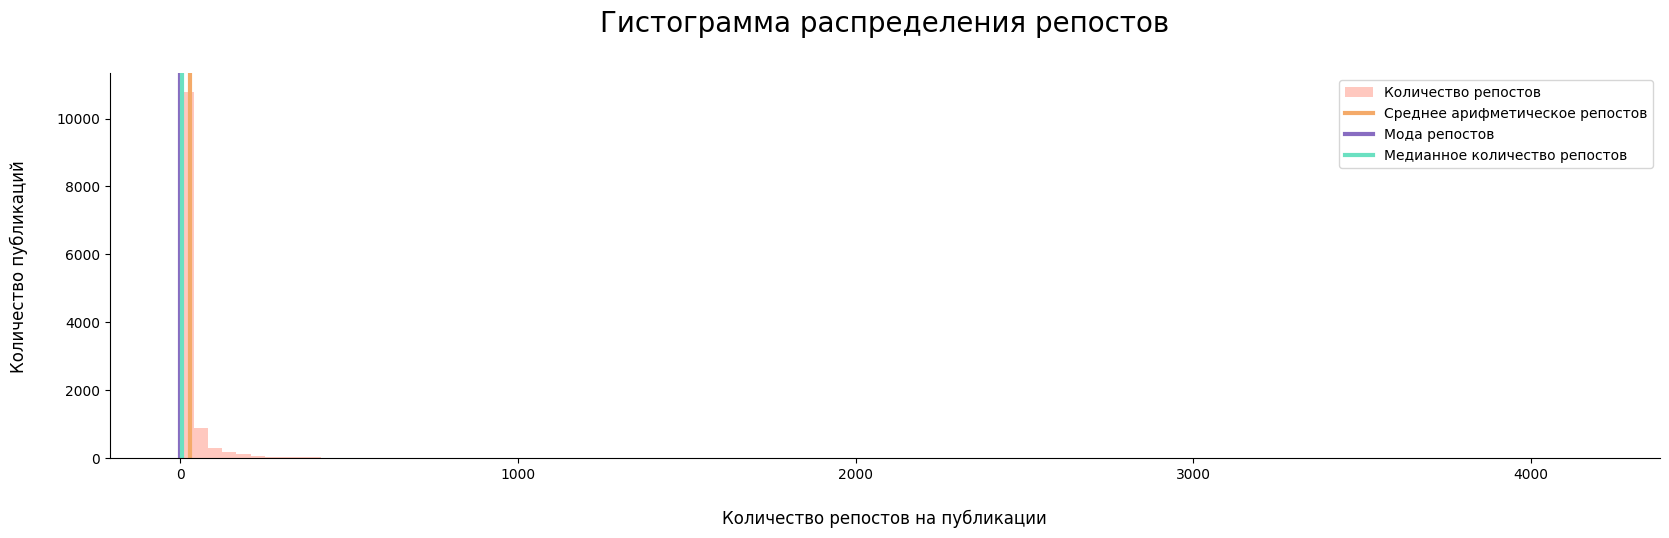

In [ ]:
fig3_data = df_lemm['reposts']

fig3, axis3 = plt.subplots(figsize=(20, 5))

axis3.hist(fig3_data, color=pink_color, bins=100, label='Количество репостов')

axis3.set_xlabel('Количество репостов на публикации', **lfont, labelpad = 20)
axis3.set_ylabel('Количество публикаций', **lfont, labelpad = 20)

axis3.axvline(fig3_data.mean(), color = orange_color, label='Среднее арифметическое репостов', linewidth=3)
axis3.axvline(fig3_data.mode()[0], color = purple_color, label='Мода репостов', linewidth=3)
axis3.axvline(fig3_data.median(), color = green_color, label='Медианное количество репостов', linewidth=3)

axis3.set_title('Гистограмма распределения репостов', **tfont, pad = 30)

axis3.spines['top'].set_visible(False)
axis3.spines['right'].set_visible(False)

axis3.legend();

In [ ]:
print(f'Минимальное количество репостов: {fig3_data.min()}')
print(f'Максимальное количество репостов: {fig3_data.max()}')
print(f'Среднеквадратичное отклонение: {round(fig3_data.std(), 2)}')

Минимальное количество репостов: 0
Максимальное количество репостов: 4172
Среднеквадратичное отклонение: 113.89


Как и предыдущие две категории данных, репосты имеют значительный перевес в сторону меньших значений при наличии крупных выбросов. При этом, большинство публикаций в принципе не репостятся (мода равна 0)

**Количество комментариев**

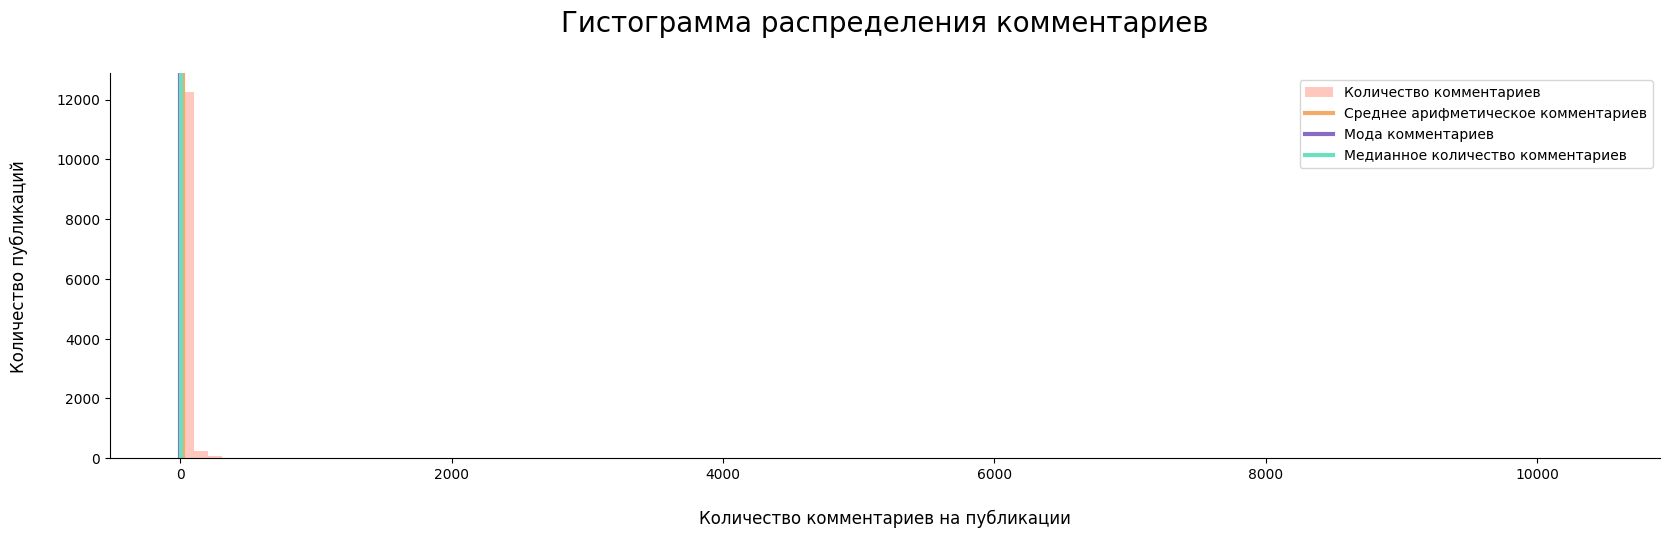

In [ ]:
fig4_data = df_lemm['comments']

fig4, axis4 = plt.subplots(figsize=(20, 5))

axis4.hist(fig4_data, color=pink_color, bins=100, label='Количество комментариев')

axis4.set_xlabel('Количество комментариев на публикации', **lfont, labelpad = 20)
axis4.set_ylabel('Количество публикаций', **lfont, labelpad = 20)

axis4.axvline(fig4_data.mean(), color = orange_color, label='Среднее арифметическое комментариев', linewidth=3)
axis4.axvline(fig4_data.mode()[0], color = purple_color, label='Мода комментариев', linewidth=3)
axis4.axvline(fig4_data.median(), color = green_color, label='Медианное количество комментариев', linewidth=3)

axis4.set_title('Гистограмма распределения комментариев', **tfont, pad = 30)

axis4.spines['top'].set_visible(False)
axis4.spines['right'].set_visible(False)

axis4.legend();

In [ ]:
print(f'Минимальное количество комментариев: {fig4_data.min()}')
print(f'Максимальное количество комментариев: {fig4_data.max()}')
print(f'Среднеквадратичное отклонение: {round(fig4_data.std(), 2)}')

Минимальное количество комментариев: 0
Максимальное количество комментариев: 10381
Среднеквадратичное отклонение: 119.26


Ситуация с комментариями продолжает тенденцию на ассиметричное распределение данных. Как и в случае с репостами, большинство публикаций в официальном паблике Bubble не имеют комментариев (мода равна 0)

**Дата и время публикации**

In [ ]:
print(f'Самый частый год среди публикаций: {df_lemm.year.mode()[0]}')
print(f'Самый частый месяц среди публикаций: {df_lemm[df_lemm.year != 2024].month.mode()[0]}')
print(f'Самая частый день месяца среди публикаций : {df_lemm[df_lemm.year != 2024].day.mode()[0]}')
print(f'Самый частовстречающийся час публикации: {df_lemm.hour.mode()[0]}')
print(f'Самая частовстречающаяся минута публикации: {df_lemm.minute.mode()[0]}')
print(f'Самая частовстречающаяся секунда публикации: {df_lemm.second.mode()[0]}')

Самый частый год среди публикаций: 2020
Самый частый месяц среди публикаций: 10
Самая частый день месяца среди публикаций : 1
Самый частовстречающийся час публикации: 9
Самая частовстречающаяся минута публикации: 0
Самая частовстречающаяся секунда публикации: 0


Увидим, что больше всего публикаций было в 2020 году, а также в первых числах месяцев. При этом при фильтрации по месяцам я исключаю из выборки 2024 год, так как он не имеет данных по месяцам после апреля

Также увидим, что самое популярное время публикации - 9 утра

**Популярность**

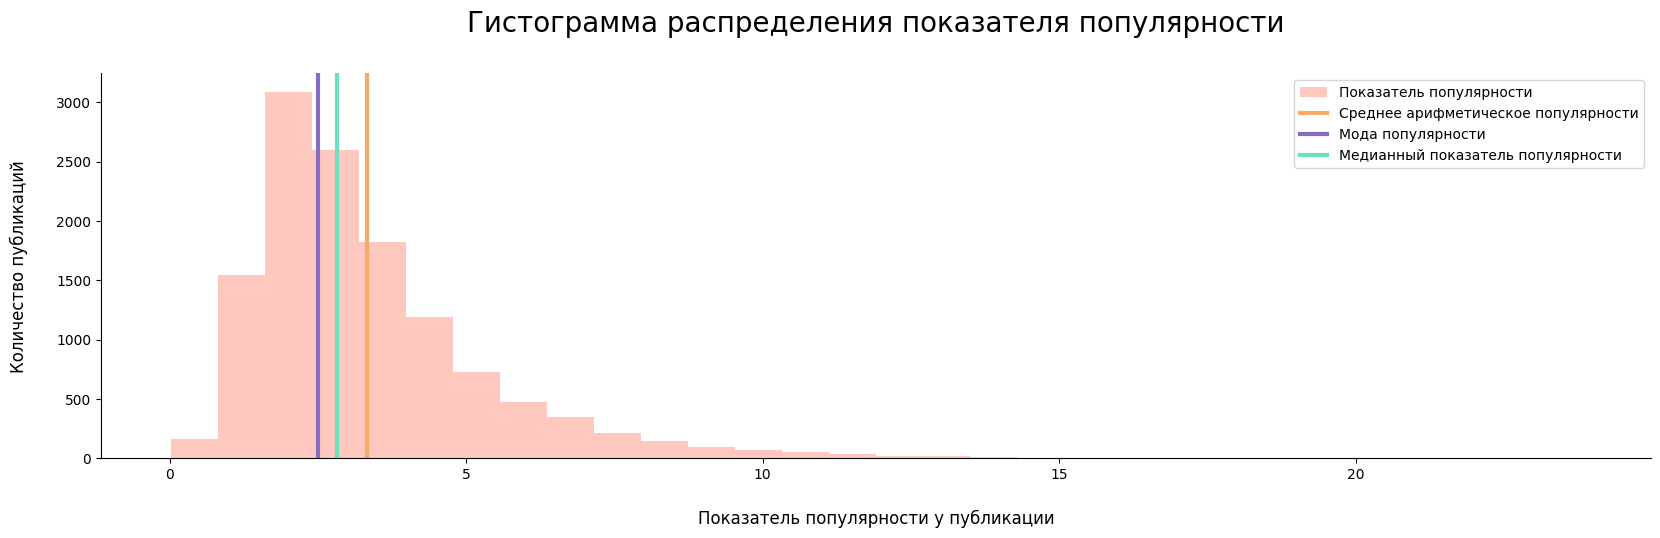

In [ ]:
fig5_data = df_lemm['popularity']

fig5, axis5 = plt.subplots(figsize=(20, 5))

axis5.hist(fig5_data, color=pink_color, bins=30, label='Показатель популярности')

axis5.set_xlabel('Показатель популярности у публикации', **lfont, labelpad = 20)
axis5.set_ylabel('Количество публикаций', **lfont, labelpad = 20)

axis5.axvline(fig5_data.mean(), color = orange_color, label='Среднее арифметическое популярности', linewidth=3)
axis5.axvline(fig5_data.mode()[0], color = purple_color, label='Мода популярности', linewidth=3)
axis5.axvline(fig5_data.median(), color = green_color, label='Медианный показатель популярности', linewidth=3)

axis5.set_title('Гистограмма распределения показателя популярности', **tfont, pad = 30)

axis5.spines['top'].set_visible(False)
axis5.spines['right'].set_visible(False)

axis5.legend();

In [ ]:
print(f'Минимальный показатель популярности: {fig5_data.min()}')
print(f'Максимальный показатель популярности: {fig5_data.max()}')
print(f'Среднеквадратичное отклонение: {round(fig5_data.std(), 2)}')

Минимальный показатель популярности: 0.03
Максимальный показатель популярности: 23.79
Среднеквадратичное отклонение: 1.98


In [ ]:
print(f'Самая частая категория популярности: {df_lemm.popularity_class.mode()[0]}')

Самая частая категория популярности: Средний


Распределение популярности, несмотря на некоторый перевес в меньшую сторону, обладает наиболее равномерным распределением среди всех данных. Чаще всего публикации относятся к средней категории популярности и имеют значение 2.5%. При этом максимальное значение достигает почти 24%

**Длина текста**

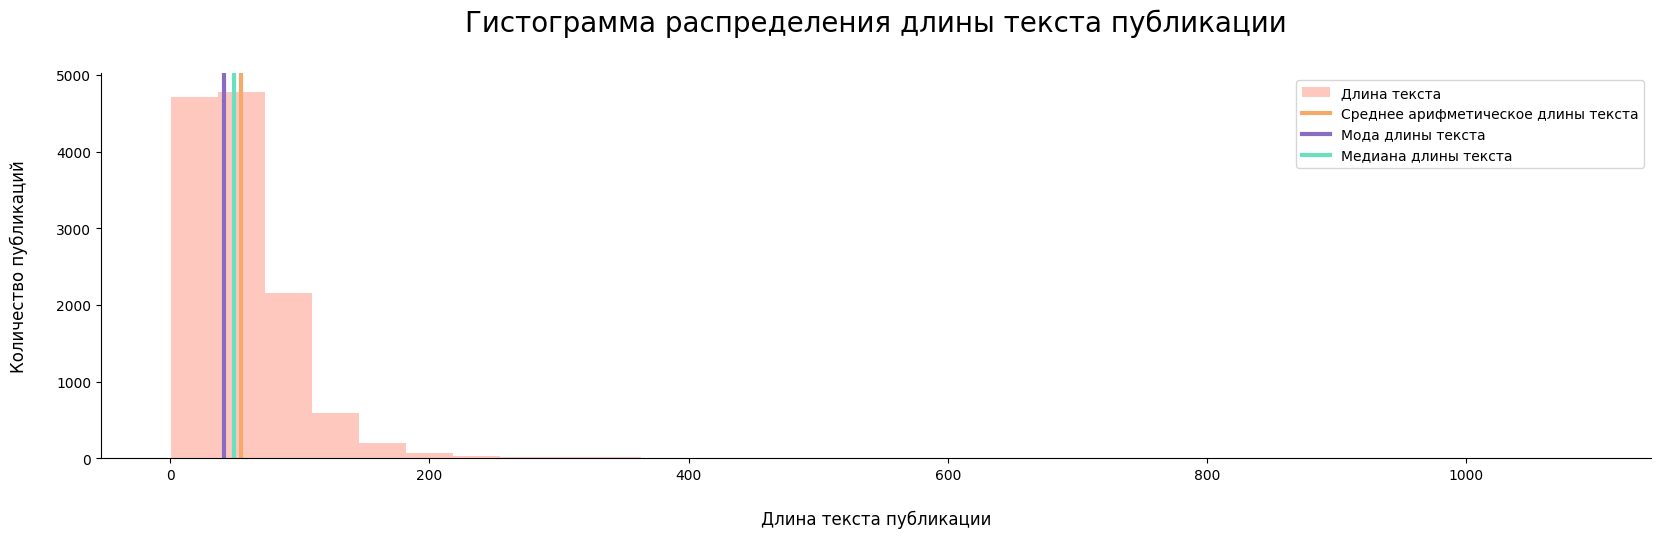

In [ ]:
fig6_data = df_lemm['len_text']

fig6, axis6 = plt.subplots(figsize=(20, 5))

axis6.hist(fig6_data, color=pink_color, bins=30, label='Длина текста')

axis6.set_xlabel('Длина текста публикации', **lfont, labelpad = 20)
axis6.set_ylabel('Количество публикаций', **lfont, labelpad = 20)

axis6.axvline(fig6_data.mean(), color = orange_color, label='Среднее арифметическое длины текста', linewidth=3)
axis6.axvline(fig6_data.mode()[0], color = purple_color, label='Мода длины текста', linewidth=3)
axis6.axvline(fig6_data.median(), color = green_color, label='Медиана длины текста', linewidth=3)

axis6.set_title('Гистограмма распределения длины текста публикации', **tfont, pad = 30)

axis6.spines['top'].set_visible(False)
axis6.spines['right'].set_visible(False)

axis6.legend();

In [ ]:
print(f'Минимальная длина текста: {fig6_data.min()}')
print(f'Максимальная длина текста: {fig6_data.max()}')
print(f'Среднеквадратичное отклонение: {round(fig6_data.std(), 2)}')

Минимальная длина текста: 1
Максимальная длина текста: 1088
Среднеквадратичное отклонение: 41.61


Как и все предыдущие данные, длина текстов обладает ассиметричным распределением в меньшую сторону. В собранных данных самый длинный текст содержит в себе 1088 слов и посвящен информации о некотором конфликте внутри чата фанатов издательства

**Сравнение длин необработанного и обработанного текстов**

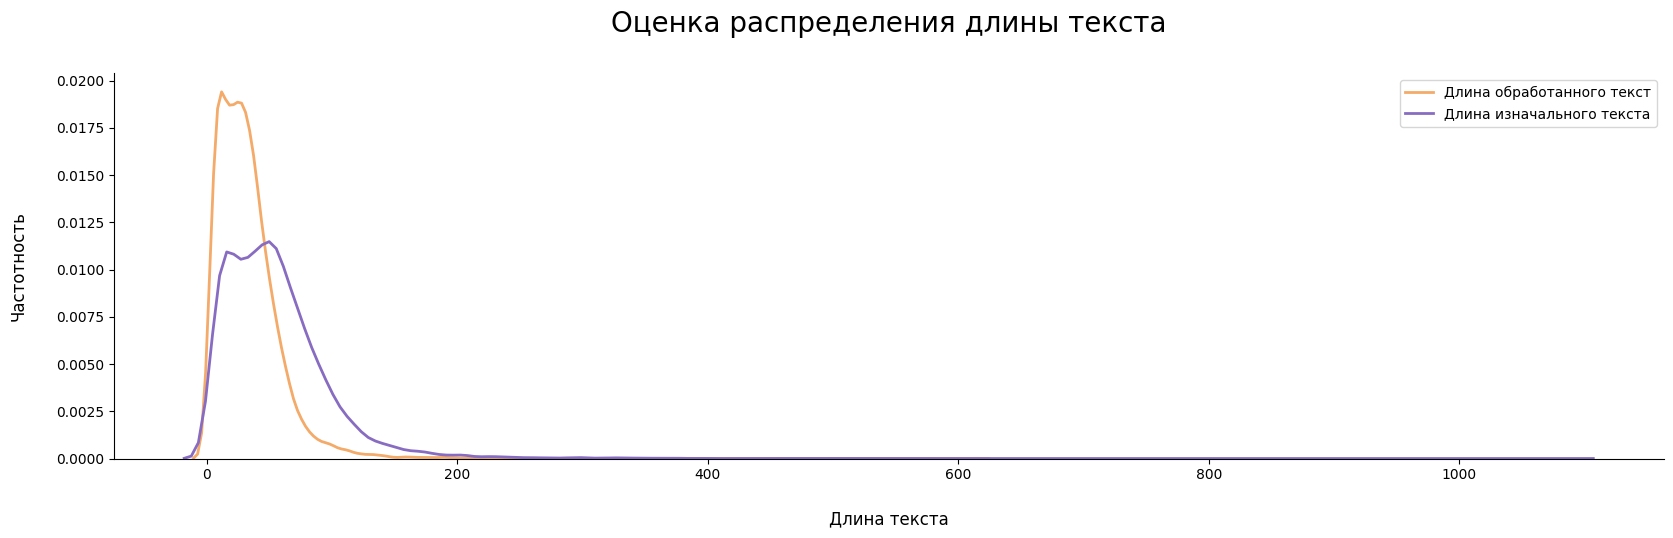

In [ ]:
fig7_data = df_lemm['lem_stem'].apply(lambda x: len(x))

fig7, axis7 = plt.subplots(figsize=(20, 5))

axis7 = sb.kdeplot(data = df_lemm, x = fig7_data, color = orange_color,
                   linewidth = 2, label = 'Длина обработанного текст')
axis7 = sb.kdeplot(data = df_lemm, x = 'len_text', color = purple_color,
                   linewidth = 2, label = 'Длина изначального текста')

axis7.set_xlabel('Длина текста', **lfont, labelpad = 20)
axis7.set_ylabel('Частотность', **lfont, labelpad = 20)

axis7.set_title('Оценка распределения длины текста', **tfont, pad = 30)

axis7.spines['top'].set_visible(False)
axis7.spines['right'].set_visible(False)

axis7.legend();

Сравнивая распределения длин обработанных и необработанных текстов, можно увидеть, что изначально тексты имели более горизонтальное распределение, сосредотачиваясь в пределах от 0 до 200 слов, но также имея крупные выбросы. После обработки диапазон длин уменьшился и стал от 0 до примерно 150 слов

Частотность длины текста до 100 слов после обработки **увеличилась в 2 раза**

## Векторизация корпуса текстов

Импорт необходимых библиотек

In [ ]:
from pymystem3 import Mystem
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import gensim.downloader as api
from tqdm import tqdm

In [ ]:
tqdm.pandas()

Создание текстов по всем методам по корпусу собранных публикаций

In [ ]:
#Загружаю датафрейм
df_bubble = pd.read_csv('Обработанные_тексты_Bubble.csv')

In [ ]:
df_bubble.head()

,description,title,text,views,likes,reposts,comments,date,year,month,day,hour,minute,second,len_text,popularity,popularity_class,lem_stem
0,NaN,NaN,А вот и расписание электронных новинок на апре...,24766,613,52,31,2024-03-30 13:00:04,2024,3,30,13,0,4,24,2.81,Средний,"['расписание', 'электронный', 'новинка', 'апре..."
1,NaN,NaN,"ПОСЛЕДНИЙ ДЕНЬ ПРЕДЗАКАЗА!\n\nНапоминаем всем,...",3625,116,4,2,2024-04-16 09:00:01,2024,4,16,9,0,1,49,3.37,Средний,"['последний', 'день', 'предзаказ', 'напоминать..."
2,NaN,NaN,Солнечный Димочка с утра — залог хорошего дня!...,6968,292,10,1,2024-04-16 06:00:01,2024,4,16,6,0,1,16,4.35,Высокий,"['солнечный', 'димочка', 'утро', 'залог', 'хор..."
3,NaN,NaN,Сегодня свой день рождения отмечает наша прекр...,5378,168,0,3,2024-04-15 15:00:03,2024,4,15,15,0,3,52,3.18,Средний,"['сегодня', 'день', 'рождение', 'отмечать', 'п..."
4,NaN,NaN,⚡️ ИЗМЕНЕНИЯ В ГРАФИКЕ РАБОТЫ МАГАЗИНА ⚡️\n\nО...,5430,129,1,1,2024-04-15 13:00:02,2024,4,15,13,0,2,30,2.41,Средний,"['изменение', 'график', 'работа', 'магазин', '..."


In [ ]:
#Преобразовываю список обратно в формат списка
df_bubble['lem_stem'] = df_bubble['lem_stem'].apply(lambda x: x[2:-2].split("', '"))

**BoW**

По мере проведения анализа, были выявлены слова, частота использования которых превысила показать в 1500. Было принято решение убрать такие слова, так как это мешало восприятию итогового графика

In [ ]:
#Записываю отобранные слова в список
stopwords_bow = ['комикс', 'быть', 'новый', 'гром', 'выпуск', 'день', 'ждать', 'экслибриум', 'книга', 'обложка', 'один', 'история', 'сегодня', 'можно', 'игорь', 'мочь', 'бесобый', 'время', 'сайт', 'майор', 'магазин', 'герой', 'художник', 'серия', 'получать', 'мир', 'друг']

In [ ]:
#Создаюи векторайзер, в который передаю стоп слова, а также минимальную границу частоты употребления слова
bow_vectorizer = CountVectorizer(stop_words = stopwords_bow, min_df = 15)

Обрабатываю свой корпус данных

In [ ]:
#Применяю векторайзер к столбцу с преобразованными текстами, предварительно объединив списки в строку с разделением по пробелу
X_bow_bubble = bow_vectorizer.fit_transform(df_bubble['lem_stem'].apply(lambda x: ' '.join(x))).toarray()

X_bow_bubble #получившийся массив

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#Через функцию get_features_names_out() получаю информацию об отсортированных уникальных словах в своем корпусе
bow_vect_names = bow_vectorizer.get_feature_names_out()

In [ ]:
#Для удобства загружаю массив в таблицу, где названия колонок - это уникальные слова корпуса
df_bubble_bow_vect = pd.DataFrame(X_bow_bubble, columns = bow_vect_names)

df_bubble_bow_vect

,авантюра,авантюрист,август,автограф,автоматически,автор,авторский,авторство,агат,агата,...,ян,яна,январь,яндекс,яркий,ярко,ярмарка,ярх,ясно,ящик
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12607,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12608,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(f'Длина векторов: {df_bubble_bow_vect.shape[1]}')

Длина векторов: 2959


Теперь отрисуем график

In [ ]:
#Считаю сумму для каждой колонки, чтобы определить, сколько раз встречалось то или иное слово
#Сортирую их в порядке от большего к меньшему
vect_bow_count = df_bubble_bow_vect.sum().sort_values(ascending = False)

In [ ]:
print(f'Медиана количества упоминания слова: {vect_bow_count.median()}')
print(f'Среднее количества упоминания слова: {round(vect_bow_count.mean())}')

Медиана количества упоминания слова: 42.0
Среднее количества упоминания слова: 101


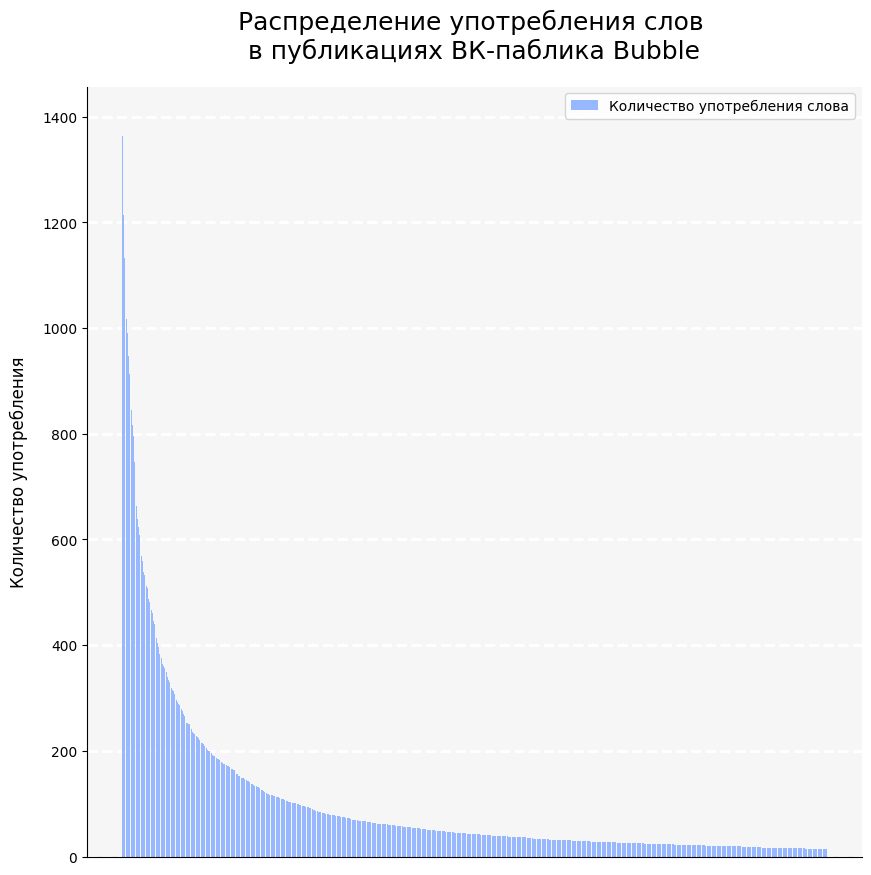

In [ ]:
fig, axis = plt.subplots(figsize = (10, 10))
plt.grid(color = 'w', linestyle = '--', axis = 'y', linewidth = 2)
axis.set_facecolor('#F6F6F6')
axis.set_axisbelow(True)

axis.bar(vect_bow_count.index, vect_bow_count.values, color = '#97B8FF',
         label = 'Количество употребления слова')

axis.set_ylabel('Количество употребления', fontsize = 12, labelpad = 10)
plt.xticks([])

axis.set_title('Распределение употребления слов \nв публикациях ВК-паблика Bubble',
               fontsize = 18, pad = 20)

axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)

axis.legend();

Дополняю датафрейм классом популярности, подсчитаным в изначальном корпусе

In [ ]:
df_bubble_bow_vect = pd.concat([df_bubble_bow_vect, df_bubble['popularity_class']], axis = 1)

Сохраняю полученный датафрейм в отдельный файл

In [ ]:
df_bubble_bow_vect.to_csv('BoW_Bubble.csv')

**TF-IDF**

Для подсчета TF-IDF передаю те же стоп-слова, а также минимальное значение

In [ ]:
tf_vectorizer = TfidfVectorizer(stop_words = stopwords_bow, min_df = 15)

In [ ]:
#Обрабатываю тексты, получаю названия для колонок, преобразовываю в датафрейм
X_tf_bubble = tf_vectorizer.fit_transform(df_bubble['lem_stem'].apply(lambda x: ' '.join(x))).toarray()

tf_vect_names = tf_vectorizer.get_feature_names_out()

df_bubble_tf_vect = pd.DataFrame(X_tf_bubble, columns = tf_vect_names)

df_bubble_tf_vect

,авантюра,авантюрист,август,автограф,автоматически,автор,авторский,авторство,агат,агата,...,ян,яна,январь,яндекс,яркий,ярко,ярмарка,ярх,ясно,ящик
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12606,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12607,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.144504,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12608,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.156613,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12609,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f'Длина векторов: {df_bubble_tf_vect.shape[1]}')

Длина векторов: 2959


Дополняю датафрейм классом популярности

In [ ]:
df_bubble_tf_vect = pd.concat([df_bubble_tf_vect, df_bubble['popularity_class']], axis = 1)

Скачиваю получившийся файл

In [ ]:
df_bubble_tf_vect.to_csv('TF_IDF_Bubble.csv')

**Word2Wec**

Загружаю предобработанную модель

In [ ]:
wv = api.load('word2vec-ruscorpora-300')

[==================================================] 100.0% 198.8/198.8MB downloaded


In [ ]:
list(wv.index_to_key)[:10]

['весь_DET',
 'человек_NOUN',
 'мочь_VERB',
 'год_NOUN',
 'сказать_VERB',
 'время_NOUN',
 'говорить_VERB',
 'становиться_VERB',
 'знать_VERB',
 'самый_DET']

Каждое слово в моделе "обрезаю" по нижнему подчеркиванию, чтобы отделить слово от ненужной части с указанием части речи, а затем сохраняю слова в список

In [ ]:
vocab = []
for w in list(wv.index_to_key):
  vocab.append(w.split('_')[0])

In [ ]:
#Создаю функцию, которая принимает на вход список слов текста
def word_wec_text(list_texts):
    vectors_word = []
    #Для каждого слова в списке
    for i in list_texts:
        #Если слово в созданном по моделе списке слов
        if i in vocab:
            #получаю вектор данного слова из модели
            vectors_word.append(wv[list(wv.index_to_key)[vocab.index(i)]])
        else:
            #Если слова нет, то в список добавляется вектор из 300 нулей
            vectors_word.append(np.zeros(300))
    #Возвращаю среднее значение массива векторов
    vector_text = np.mean(vectors_word, axis = 0)

    return vector_text

Применяем полученную функцию к каждому тексту в колонке предобработанных текстов

In [ ]:
#Использую progress_apply из библиотеки tqdm, чтобы видеть прогресс операции
wec_words_vectors = df_bubble['lem_stem'].progress_apply(word_wec_text)

100%|██████████| 12611/12611 [33:05<00:00,  6.35it/s]


Полученный результат сохраняю в формат списка, а зачем преобразовываю в таблицу

In [ ]:
df_bubble_wec = pd.DataFrame(list(wec_words_vectors))

Добавляю последним столбцом класс популярности из оригинального датафрейма

In [ ]:
df_bubble_wec = pd.concat([df_bubble_wec, df_bubble['popularity_class']], axis = 1)

In [ ]:
df_bubble_wec

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,popularity_class
0,0.038263,0.015071,-0.006309,0.014721,-0.041136,0.013565,0.014364,0.013754,-0.022715,-0.003128,...,0.016283,-0.039761,-0.004818,-0.016272,-0.037521,0.018518,-0.004051,-0.043444,-0.013559,Средний
1,0.027185,0.013482,-0.001238,0.026057,-0.015837,0.002186,0.013732,-0.006112,0.002768,-0.026979,...,0.010728,0.013943,-0.001912,-0.024918,-0.016668,0.009830,0.015990,-0.028819,-0.018043,Средний
2,0.010237,-0.006231,0.031134,0.036754,-0.018589,0.020772,0.013511,-0.028682,0.018952,0.007001,...,0.019833,-0.012024,0.022347,-0.019085,-0.013355,0.004240,-0.000365,-0.029825,0.011528,Высокий
3,0.005048,0.011606,0.006671,0.020977,-0.016206,0.020434,-0.005864,0.010415,0.016672,-0.006682,...,0.013512,-0.019273,0.013745,-0.022822,-0.026299,0.009870,0.041037,-0.026763,0.003707,Средний
4,0.051705,-0.010571,-0.012632,0.041446,-0.014856,0.029196,0.024996,-0.012287,0.000560,-0.024038,...,0.036348,-0.029235,0.001565,-0.011815,-0.046521,0.028699,-0.017712,-0.025201,-0.022279,Средний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12606,0.008606,0.016504,0.018259,0.025171,-0.024397,0.028783,0.007563,0.009384,0.001914,-0.013365,...,0.037974,0.003423,0.010740,-0.026217,-0.053142,0.049953,0.021167,-0.042617,-0.016420,Средний
12607,0.018197,0.006207,0.005732,0.020784,-0.009292,0.015345,0.001705,0.000483,0.007171,-0.000174,...,0.017743,-0.001160,0.022035,-0.021318,-0.028828,0.028273,0.015099,-0.030686,-0.004079,Средний
12608,0.010770,0.009057,0.027404,0.010536,-0.002670,0.022063,0.018508,0.001989,0.002327,-0.020059,...,0.018222,-0.019164,0.023816,-0.038654,-0.023361,0.022527,0.016440,-0.035381,-0.004990,Средний
12609,0.002544,-0.002141,0.008358,0.033040,-0.013499,0.037914,0.008801,-0.000927,-0.020830,0.005010,...,0.030461,-0.006520,0.027172,-0.031684,-0.038746,0.033012,0.035972,-0.046777,-0.005592,Средний


In [ ]:
#Вычитаю из длины 1, так как ранее была добавлена колонка с популярностью
print(f'Длина векторов: {df_bubble_wec.shape[1] - 1}')

Длина векторов: 300


## Масштабирование

При выборе масштабирования было решено попробовать два варианта, чтобы сравнить их результаты в дальнейшних анализах

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Нормализация

In [ ]:
#Создаем нормалайзер
sc = Normalizer()
#Применяем его к срезу колонок датафрейма, кроме последней с категорией популярности
bubble_norm = sc.fit_transform(df_bubble.loc[:, df_bubble.columns != 'popularity_class'])

In [ ]:
#Сохраняем полученный результат в датафрейм
df_norm = pd.DataFrame(bubble_norm)

In [ ]:
#Добавляем к датафрейму колонку с классом популярности
df_norm_bubble = pd.concat([df_norm, df_bubble['popularity_class']], axis = 1)

df_norm_bubble.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,popularity_class
0,0.077251,0.030428,-0.012738,0.029721,-0.083052,0.027387,0.028999,0.027768,-0.045861,-0.006315,...,0.032875,-0.080276,-0.009726,-0.032852,-0.075754,0.037387,-0.008179,-0.087710,-0.027374,Средний
1,0.073749,0.036575,-0.003358,0.070689,-0.042964,0.005932,0.037254,-0.016581,0.007510,-0.073192,...,0.029104,0.037825,-0.005188,-0.067600,-0.045218,0.026669,0.043379,-0.078183,-0.048949,Средний
2,0.022455,-0.013668,0.068296,0.080622,-0.040778,0.045565,0.029638,-0.062916,0.041574,0.015358,...,0.043505,-0.026376,0.049020,-0.041865,-0.029296,0.009301,-0.000801,-0.065425,0.025287,Высокий
3,0.012661,0.029106,0.016729,0.052607,-0.040641,0.051245,-0.014705,0.026119,0.041811,-0.016757,...,0.033887,-0.048333,0.034471,-0.057233,-0.065952,0.024752,0.102915,-0.067117,0.009296,Средний
4,0.108652,-0.022213,-0.026544,0.087095,-0.031219,0.061353,0.052526,-0.025820,0.001176,-0.050513,...,0.076382,-0.061434,0.003289,-0.024829,-0.097758,0.060307,-0.037221,-0.052958,-0.046817,Средний


### Стандартизация

In [ ]:
#Создаем стандартизатор
sc = StandardScaler()
#применяем его к срезу колонок датафрейма, кроме последней с категорией популярности
bubble_stand = sc.fit_transform(df_bubble.loc[:, df_bubble.columns != 'popularity_class'])

In [ ]:
#Сохраняем результат в датафрейм
df_stand = pd.DataFrame(bubble_stand)

In [ ]:
#Добавляем к датафрейму колонку с классом популярности
df_stand_bubble = pd.concat([df_stand, df_bubble['popularity_class']], axis = 1)

df_stand_bubble.head()

## PCA

Перед применением PCA требуется определить количество главных компонентов

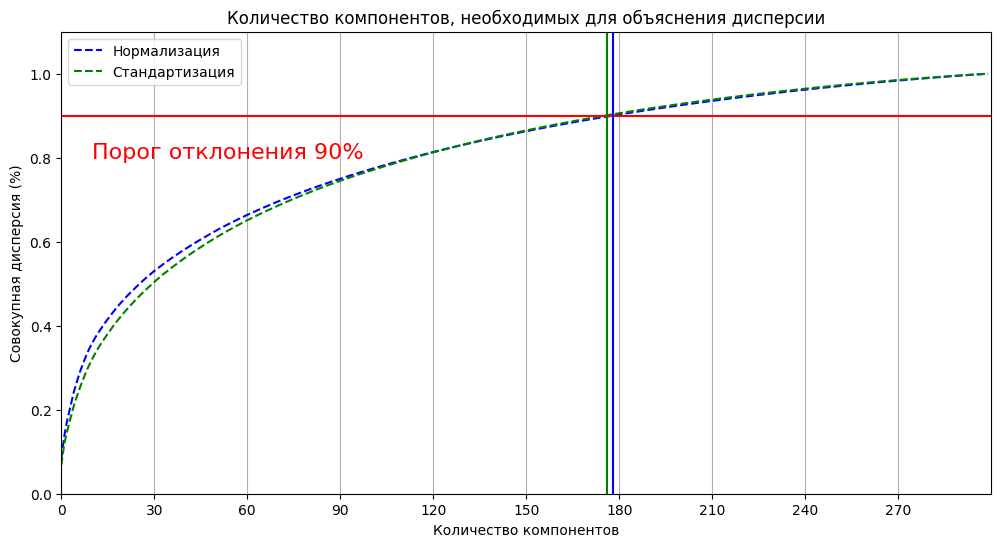

In [ ]:
#Создаем и обрабатываем данные двух методов масштабирования
pca = PCA().fit(df_norm)
pca2 = PCA().fit(df_stand)

#Создаем фигуру графика
fig, ax = plt.subplots(figsize = (12, 6))
#Считаю кумулятивную сумму
y = np.cumsum(pca.explained_variance_ratio_)
y2 = np.cumsum(pca2.explained_variance_ratio_)

#Устанавливаем границы значений по X и Y
plt.ylim(0.0, 1.1)
plt.xlim(0, 300)
#Отрисовываем два линейных графика
plt.plot(y, linestyle='--', color='b', label = 'Нормализация')
plt.plot(y2, linestyle='--', color='g', label = 'Стандартизация')

#Подписываем оси и заголовок
plt.xlabel('Количество компонентов')
plt.xticks(np.arange(0, 300, step=30))
plt.ylabel('Совокупная дисперсия (%)')
plt.title('Количество компонентов, необходимых для объяснения дисперсии')

#Добавляем линии порога и линии компонентов
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.axvline(x = 178, color = 'b', linestyle = '-')
plt.axvline(x = 176, color = 'g', linestyle = '-')
plt.text(10, 0.8, 'Порог отклонения 90%', color = 'red', fontsize=16)

#Добавляем легенду и направляющие линии
ax.grid(axis='x')
ax.legend()
plt.show()

In [ ]:
#Считаем новый PCA с уже известным необходимым количеством компонентов для нормализованных данных
pca_norm = PCA(n_components = 178)
bubble_pca = pca_norm.fit_transform(df_norm)

In [ ]:
len(bubble_pca[0])

178

In [ ]:
#Сохраняем полученный результат в датафрейм и добавляем колонку с классом популярности
df_pca_bubble = pd.DataFrame(bubble_pca)
df_pca_bubble = pd.concat([df_pca_bubble, df_bubble['popularity_class']], axis = 1)

df_pca_bubble.head()

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,popularity_class
0,-0.255057,0.239779,0.067876,0.073199,0.040478,0.003866,-0.123190,0.009132,-0.079890,-0.038340,...,0.026618,0.008044,-0.024308,-0.003949,0.026138,-0.013010,-0.000886,-0.002839,-0.015501,Средний
1,-0.098155,0.132171,-0.006416,0.098784,-0.122978,0.058320,-0.000885,-0.127162,0.041520,-0.075823,...,-0.029810,0.002802,-0.011415,-0.002732,0.025700,0.019812,-0.027545,-0.003602,-0.032070,Средний
2,0.143214,0.036343,0.050078,-0.030067,-0.134864,-0.027095,-0.184014,0.023882,-0.006260,0.097836,...,0.001781,0.000968,-0.019407,0.027981,0.019361,-0.015007,0.002793,0.010996,-0.010880,Высокий
3,0.079312,-0.084114,-0.049670,-0.107328,-0.088340,0.009338,-0.066575,-0.082982,0.065643,-0.008614,...,-0.004153,0.006957,-0.007061,0.003588,0.013808,0.009640,-0.001418,0.013792,-0.019132,Средний
4,-0.126056,0.321809,0.046554,0.045163,-0.076704,0.039669,-0.005907,-0.116769,-0.080261,-0.140663,...,-0.013968,0.001279,-0.005495,-0.027035,0.023265,-0.025089,-0.027078,-0.003494,0.023867,Средний


In [ ]:
#Скачиваем датафрейм
df_pca_bubble.to_csv('Анализ_главных_компонентов_Bubble.csv', index=False)

## Линейный дискриминантный анализ

In [ ]:
#Проводим ЛДА по 2 компонентам, где X - нормализованные данные, а Y - класс популярности поста
lda = LinearDiscriminantAnalysis(n_components = 2)
res = lda.fit_transform(df_norm, df_bubble['popularity_class'])
#Сохраняем в датафрейм и добавляем колонку с классом популярности
res = pd.DataFrame(data = res, columns = ['component 1', 'component 2'])
res['target'] = df_bubble['popularity_class']

In [ ]:
res.head()

,component 1,component 2,target
0,-0.348688,-0.944471,Средний
1,0.241245,-0.678991,Средний
2,-1.604030,1.143533,Высокий
3,-0.612729,0.050574,Средний
4,-0.108372,-1.523165,Средний


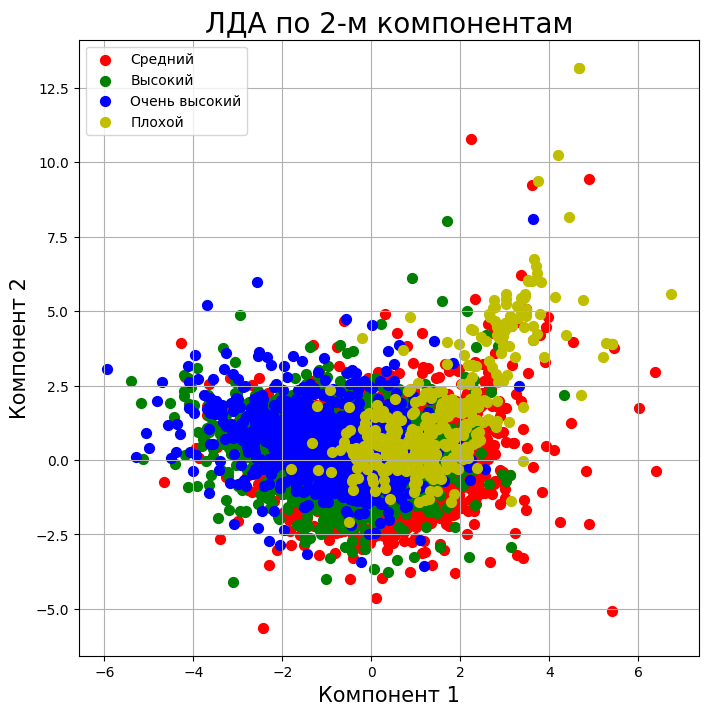

In [ ]:
#Создаем фигуру
fig, ax = plt.subplots(figsize = (8, 8))

#Подписываем оси и заголовок, задаем цвета
ax.set_xlabel('Компонент 1', fontsize = 15)
ax.set_ylabel('Компонент 2', fontsize = 15)
ax.set_title('ЛДА по 2-м компонентам', fontsize = 20)
colors = ['r', 'g', 'b', 'y']

#Отрисовываем график рассеивания для каждого класса популярности
for target, color in zip(res['target'].unique(), colors):
    indicesToKeep = res['target'] == target
    ax.scatter(
        res.loc[indicesToKeep, 'component 1'],
        res.loc[indicesToKeep, 'component 2'],
        c=color,
        s=50
    )
#Добавляем легенду из уникальных классов и сетку
ax.legend(res['target'].unique())
ax.grid()

### Дополнительная LDA проверка

Меня смутило распределение данных на графике нормализованных Word2Vec данных, так что было решено посчитать ЛДА для Bag of Words

In [ ]:
#Загружаем файл
df_bow = pd.read_csv('BoW_Bubble.csv', index_col = 0)

#Нормализуем все вектора, исключая последний столбик
bow_norm = sc.fit_transform(df_bow.loc[:, df_bow.columns != 'popularity_class'])

#Проводим ЛДА и сохраняем данные в датафрейм
res3 = lda.fit_transform(bow_norm, df_bubble['popularity_class'])
res3 = pd.DataFrame(data = res3, columns = ['component 1', 'component 2'])
res3['target'] = df_bubble['popularity_class']

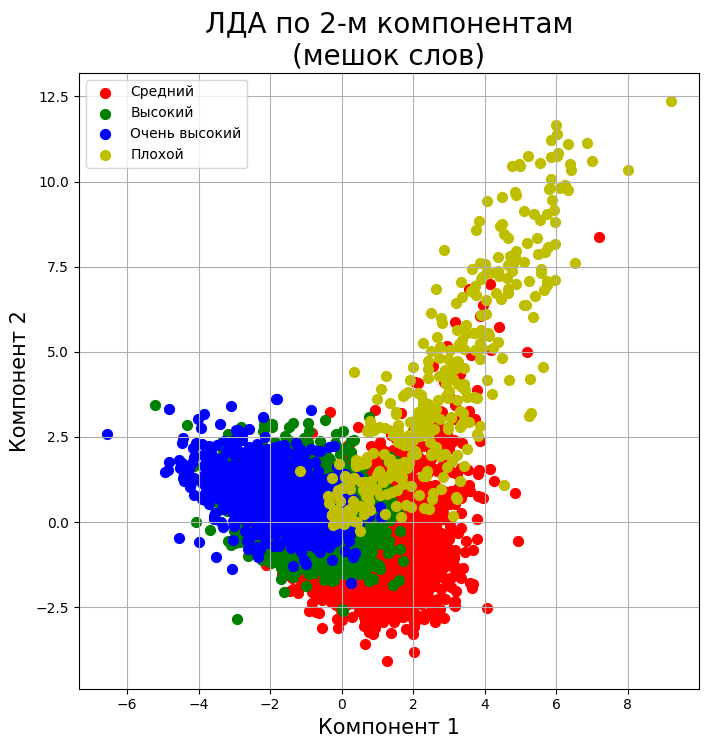

In [ ]:
#Создаем фигуру
fig, ax = plt.subplots(figsize = (8, 8))

#Определяем заголовок и цвета
colors = ['r', 'g', 'b', 'y']
title_name = 'ЛДА по 2-м компонентам\n(мешок слов)'

#Подписываем оси и заголовок
ax.set_xlabel('Компонент 1', fontsize = 15)
ax.set_ylabel('Компонент 2', fontsize = 15)
ax.set_title(title_name, fontsize = 20)

#Отрисовываем график рассеивания для каждого уникального класса популярности
for target, color in zip(res3['target'].unique(), colors):
    indicesToKeep = res3['target'] == target
    ax.scatter(
        res3.loc[indicesToKeep, 'component 1'],
        res3.loc[indicesToKeep, 'component 2'],
        c=color,
        s=50
    )

#Добавляем легенду и сетку
ax.legend(res3['target'].unique())
ax.grid()

Как может быть заметно, результат не сильно изменился после смены данных

## Создание модели и предсказание данных

### Разделение корпуса данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning, UserWarning
from joblib import dump, load
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from string import punctuation
from pymystem3 import Mystem
import re
import gensim.downloader as api
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Указываю 4 переменные, куда будут записываться получившиеся данные. За Х беру векторы, за Y - класс популярности. Размер тестовой выборки определяю как 20%, отключаю стратификацию и перемешивание. Для повторяемости результов указываю в переменную random_state значение 7

In [ ]:
vec_train, vec_test, popularity_train, popularity_test = train_test_split(
    df_bubble.loc[:, df_bubble.columns != 'popularity_class'],
    df_bubble['popularity_class'],
    test_size = 0.2,
    shuffle = False,
    random_state = 7,
    stratify = None
)

### Подбор гиперпараметров для дерева решений

**Решетчатый поиск**

In [ ]:
def createList(start, end):
    res = []
    for i in range(start, end+1):
        res.append(i)

    return res

In [ ]:
param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : createList(5, 200),
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=7)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(vec_train, popularity_train)

In [ ]:
print(grid_search.best_params_)

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}


**Случайный поиск**

In [ ]:
parameters = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : createList(5, 200),
              'criterion' :['gini', 'entropy'],
              'max_leaf_nodes': createList(5, 200)}
tree_clas2 = DecisionTreeClassifier(random_state=7)
random_search = RandomizedSearchCV(estimator = tree_clas2, param_distributions = parameters, cv = 5)
random_search.fit(vec_train, popularity_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
                   param_distributions={'ccp_alpha': [0.1, 0.01, 0.001],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [5, 6, 7, 8, 9, 10,
                                                           11, 12, 13, 14, 15,
                                                           16, 17, 18, 19, 20,
                                                           21, 22, 23, 24, 25,
                                                           26, 27, 28, 29, 30,
                                                           31, 32, 33, 34, ...]})

In [ ]:
print(random_search.best_params_)

{'max_leaf_nodes': 169, 'max_features': 'log2', 'max_depth': 134, 'criterion': 'gini', 'ccp_alpha': 0.01}


Модель из прошлой лабораторной работы:


```
clf_tree = DecisionTreeClassifier(
    criterion = 'entropy',
    splitter = 'best',
    max_depth = 200,
    class_weight = 'balanced',
    random_state = 7
)
```



**Отличия:**


*   criterion: '**entropy**' => '**gini**' (в обоих методах поиска)
*   max_features: '**log2**' (в обоих методах поиска)
*   ccp_alpha: **0.01** в случайном поиске и **0.001** в решетчатом
*   max_depth: **200** => **134** в случайном поиске и **10** в решетчатом
*   max_leaf_nodes: **169** в случайном поиске


---

Так как решетчатый метод поиска действует более точно, в указании параметров метода деревьев решений хотелось бы опираться на него, дополнив его некоторыми свойствами, которые были расчитаны с помощью случайного поиска


In [ ]:
clf_tree = DecisionTreeClassifier(
    criterion = 'gini',
    max_features = 'log2',
    ccp_alpha = 0.001,
    splitter = 'best',
    max_depth = 10,
    max_leaf_nodes = 169,
    class_weight = 'balanced',
    random_state = 7
)

In [ ]:
clf_tree_pretrained = clf_tree.fit(vec_train, popularity_train)
popularity_pred_tree = clf_tree_pretrained.predict(vec_test)

In [ ]:
def change_class(y_list):
    y_list = list(y_list)
    res = []
    for element in y_list:
        if element == 'Средний':
            res.append(0)
        elif element == 'Высокий':
            res.append(1)
        elif element == 'Очень высокий':
            res.append(2)
        elif element == 'Плохой':
            res.append(3)

    return res

In [ ]:
round(roc_auc_score(change_class(popularity_test), clf_tree_pretrained.predict_proba(vec_test), multi_class = "ovo"), 4)

0.5326

В предыдущей моделе результат оценки ROC-AUC составил **48,26%**. После смены параметров он поднялся до **53,26%**, что говорит о повышение точности предсказаний модели

### Подбор гиперпараметров для Метода опорных векторов

**Решетчатый поиск**

In [ ]:
def fit_cv_subsample (pipe_cv, X, y, n_max = 5_000):
    X_sub = X[0:n_max]
    y_sub = y[0:n_max]
    res = pipe_cv.fit(X_sub, y_sub)
    return res

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly'],
              'class_weight': ['balanced'],
              'max_iter': [100]}
svc_clas = SVC()
grid_search = GridSearchCV(svc_clas, param_grid, cv = 5)
grid_search_result = fit_cv_subsample(grid_search, vec_train, popularity_train)

In [ ]:
print(grid_search_result.best_params_)

{'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 100}


**Случайный поиск**

In [ ]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly'],
              'class_weight': ['balanced'],
              'max_iter': [100]}
svc_clas2 = SVC()
random_search = RandomizedSearchCV(estimator = svc_clas2, param_distributions = parameters, cv = 5)
random_search.fit(vec_train, popularity_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'class_weight': ['balanced'],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'max_iter': [100]})

In [ ]:
print(random_search.best_params_)

{'max_iter': 100, 'kernel': 'poly', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 100}


Модель из прошлой лабораторной работы:


```
clf_lsvc = SVC(
    kernel='linear',
    probability=True,
    C = 0.2,
    class_weight = 'balanced',
    random_state = 7,
    max_iter = 1000
)
```



**Отличия:**


*   kernel: '**linear**' => '**poly**' (в обоих методах поиска)
*   C: **0.2** => **100** в случайном поиске и **10** в решетчатом
*   gamma: **auto** в случайном поиске и **scale** в решетчатом


---

В случае данного классификатора попробуем применить несколько вариантов предложенных наборов параметров


In [ ]:
def change_class(y_list):
    y_list = list(y_list)
    res = []
    for element in y_list:
        if element == 'Средний':
            res.append(0)
        elif element == 'Высокий':
            res.append(1)
        elif element == 'Очень высокий':
            res.append(2)
        elif element == 'Плохой':
            res.append(3)

    return res

In [ ]:
@ignore_warnings(category=ConvergenceWarning)

def roc_auc_svc(C_el, gamma_el):
    clf_lsvc = SVC(
        kernel = 'poly',
        probability = True,
        C = C_el,
        gamma = gamma_el,
        class_weight = 'balanced',
        random_state = 7,
        max_iter = 100
    )

    clf_lsvc_pretrained = clf_lsvc.fit(vec_train, popularity_train)

    popularity_pred = round(roc_auc_score(change_class(popularity_test), clf_lsvc_pretrained.predict_proba(vec_test), multi_class = "ovo"), 4)

    return f'gamma = {gamma_el}, C = {C_el}: {popularity_pred}'

In [ ]:
c_list = [10, 100]
gamma_list = ['auto', 'scale']

for el in c_list:
    for gamma in gamma_list:
        print(roc_auc_svc(el, gamma))

gamma = auto, C = 10: 0.4399
gamma = scale, C = 10: 0.504
gamma = auto, C = 100: 0.4399
gamma = scale, C = 100: 0.4516


В предыдущей моделе результат оценки ROC-AUC составил **47,63%**. После смены параметров он максимально поднялся до **50,40%**, что говорит о повышение точности предсказаний модели при выборе параметров **gamma = scale, C = 10**

При этом такой показатель все еще хуже, чем у метода "Дерево решений", поэтому в дальнейшем будет использоваться именно он

### Сохранение модели

Предобучим и сохраним нормализацию и PCA, чтобы использовать в дальнейшем

In [ ]:
#Создадим новое разделение по корпусу данных после применения Word2Vec
vec_train2, vec_test2, popularity_train2, popularity_test2 = train_test_split(
    df_word2vec.loc[:, df_word2vec.columns != 'popularity_class'],
    df_word2vec['popularity_class'],
    test_size = 0.2,
    shuffle = False,
    random_state = 7,
    stratify = None
)

In [ ]:
normalizer = Normalizer()
vec_train2 = normalizer.fit_transform(vec_train2)
dump(normalizer, 'normalizer.joblib')

train_x = normalizer.transform(vec_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


In [ ]:
pca = PCA(n_components = 178)
text_pca = pca.fit_transform(train_x)
dump(pca, 'pca.joblib')

['pca.joblib']

Сохраним преобученную модель дерева решений

In [ ]:
dump(clf_tree_pretrained, 'clf_tree_pretrained.joblib')

['clf_tree_pretrained.joblib']

Сохраним полученные модели в конвеер моделей

In [ ]:
models_pipe = Pipeline([('normalizer', normalizer), ('pca', pca), ('tree', clf_tree_pretrained)])

### Создание функции подсчета популярности

Функция принимает через input текст публикации, после чего предобрабатывает его, лемматизирует, удаляет стоп-слова, векторизует через Word2Vec, а после применяет сохраненный конвеер моделей и выводит пользователю предполагаемый уровень популярности поста

In [ ]:
@ignore_warnings(category=UserWarning)

def predobrabotka(text):

    #В ситуации работы со сторонним пользователем используется input, а не передача переменной
    # text = input('Впишите текст публикации: ')

    #Загрузка моделей и создание словаря класса популярности
    word2vec = api.load('word2vec-ruscorpora-300')
    # classes = {0: 'негативный или нейтральный', 1: 'позитивный'}

    #Предобработка
    punct = list(punctuation)
    text = word_tokenize(text)
    text = [i for i in text if(i not in punct)]
    text = [i for i in text if(i.isalnum() == True)]
    text = [i for i in text if(bool(re.search('[а-яА-Я0-9]', i)) == True)]
    text_itog = [i.lower() for i in text]

    #Лемматизация
    alltext = ' '.join([txt + ' br ' for txt in text_itog])
    words = Mystem().lemmatize(alltext)
    text = []
    for txts in words:
        if txts != ' \n':
            if txts.strip() != '' and bool(re.search('[а-яА-Я0-9]', txts)) == True:
                text.append([txts])

    #Стоп-слова
    stop_words = ['c', 'а', 'алло', 'без', 'белый', 'близко', 'более', 'больше', 'большой', 'будем', 'будет', 'будете', 'будешь', 'будто', 'буду', 'будут', 'будь', 'бы', 'бывает', 'бывь', 'был', 'была', 'были', 'было', 'быть', 'в', 'важная', 'важное', 'важные', 'важный', 'вам', 'вами', 'вас', 'ваш', 'ваша', 'ваше', 'ваши', 'вверх', 'вдали', 'вдруг', 'ведь', 'везде', 'вернуться', 'весь', 'вечер', 'взгляд', 'взять', 'вид', 'видел', 'видеть', 'вместе', 'вне', 'вниз', 'внизу', 'во', 'вода', 'война', 'вокруг', 'вон', 'вообще', 'вопрос', 'восемнадцатый', 'восемнадцать', 'восемь', 'восьмой', 'вот', 'впрочем', 'времени', 'время', 'все', 'все еще', 'всегда', 'всего', 'всем', 'всеми', 'всему', 'всех', 'всею', 'всю', 'всюду', 'вся', 'всё', 'второй', 'вы', 'выйти', 'г', 'где', 'главный', 'глаз', 'говорил', 'говорит', 'говорить', 'год', 'года', 'году', 'голова', 'голос', 'город', 'да', 'давать', 'давно', 'даже', 'далекий', 'далеко', 'дальше', 'даром', 'дать', 'два', 'двадцатый', 'двадцать', 'две', 'двенадцатый', 'двенадцать', 'дверь', 'двух', 'девятнадцатый', 'девятнадцать', 'девятый', 'девять', 'действительно', 'дел', 'делал', 'делать', 'делаю', 'дело', 'день', 'деньги', 'десятый', 'десять', 'для', 'до', 'довольно', 'долго', 'должен', 'должно', 'должный', 'дом', 'дорога', 'друг', 'другая', 'другие', 'других', 'друго', 'другое', 'другой', 'думать', 'душа', 'е', 'его', 'ее', 'ей', 'ему', 'если', 'есть', 'еще', 'ещё', 'ею', 'её', 'ж', 'ждать', 'же', 'жена', 'женщина', 'жизнь', 'жить', 'за', 'занят', 'занята', 'занято', 'заняты', 'затем', 'зато', 'зачем', 'здесь', 'земля', 'знать', 'значит', 'значить', 'и', 'иди', 'идти', 'из', 'или', 'им', 'имеет', 'имел', 'именно', 'иметь', 'ими', 'имя', 'иногда', 'их', 'к', 'каждая', 'каждое', 'каждые', 'каждый', 'кажется', 'казаться', 'как', 'какая', 'какой', 'кем', 'книга', 'когда', 'кого', 'ком', 'комната', 'кому', 'конец', 'конечно', 'которая', 'которого', 'которой', 'которые', 'который', 'которых', 'кроме', 'кругом', 'кто', 'куда', 'лежать', 'лет', 'ли', 'лицо', 'лишь', 'лучше', 'любить', 'люди', 'м', 'маленький', 'мало', 'мать', 'машина', 'между', 'меля', 'менее', 'меньше', 'меня', 'место', 'миллионов', 'мимо', 'минута', 'мир', 'мира', 'мне', 'много', 'многочисленная', 'многочисленное', 'многочисленные', 'многочисленный', 'мной', 'мною', 'мог', 'могу', 'могут', 'мож', 'может', 'может быть', 'можно', 'можхо', 'мои', 'мой', 'мор', 'москва', 'мочь', 'моя', 'моё', 'мы', 'на', 'наверху', 'над', 'надо', 'назад', 'наиболее', 'найти', 'наконец', 'нам', 'нами', 'народ', 'нас', 'начала', 'начать', 'наш', 'наша', 'наше', 'наши', 'не', 'него', 'недавно', 'недалеко', 'нее', 'ней', 'некоторый', 'нельзя', 'нем', 'немного', 'нему', 'непрерывно', 'нередко', 'несколько', 'нет', 'нею', 'неё', 'ни', 'нибудь', 'ниже', 'низко', 'никакой', 'никогда', 'никто', 'никуда', 'ним', 'ними', 'них', 'ничего', 'ничто', 'но', 'новый', 'нога', 'ночь', 'ну', 'нужно', 'нужный', 'нх', 'о', 'об', 'оба', 'обычно', 'один', 'одиннадцатый', 'одиннадцать', 'однажды', 'однако', 'одного', 'одной', 'оказаться', 'окно', 'около', 'он', 'она', 'они', 'оно', 'опять', 'особенно', 'остаться', 'от', 'ответить', 'отец', 'откуда', 'отовсюду', 'отсюда', 'очень', 'первый', 'перед', 'писать', 'плечо', 'по', 'под', 'подойди', 'подумать', 'пожалуйста', 'позже', 'пойти', 'пока', 'пол', 'получить', 'помнить', 'понимать', 'понять', 'пор', 'пора', 'после', 'последний', 'посмотреть', 'посреди', 'потом', 'потому', 'почему', 'почти', 'правда', 'прекрасно', 'при', 'про', 'просто', 'против', 'процентов', 'путь', 'пятнадцатый', 'пятнадцать', 'пятый', 'пять', 'работа', 'работать', 'раз', 'разве', 'рано', 'раньше', 'ребенок', 'решить', 'россия', 'рука', 'русский', 'ряд', 'рядом', 'с', 'с кем', 'сам', 'сама', 'сами', 'самим', 'самими', 'самих', 'само', 'самого', 'самой', 'самом', 'самому', 'саму', 'самый', 'свет', 'свое', 'своего', 'своей', 'свои', 'своих', 'свой', 'свою', 'сделать', 'сеаой', 'себе', 'себя', 'сегодня', 'седьмой', 'сейчас', 'семнадцатый', 'семнадцать', 'семь', 'сидеть', 'сила', 'сих', 'сказал', 'сказала', 'сказать', 'сколько', 'слишком', 'слово', 'случай', 'смотреть', 'сначала', 'снова', 'со', 'собой', 'собою', 'советский', 'совсем', 'спасибо', 'спросить', 'сразу', 'стал', 'старый', 'стать', 'стол', 'сторона', 'стоять', 'страна', 'суть', 'считать', 'т', 'та', 'так', 'такая', 'также', 'таки', 'такие', 'такое', 'такой', 'там', 'твои', 'твой', 'твоя', 'твоё', 'те', 'тебе', 'тебя', 'тем', 'теми', 'теперь', 'тех', 'то', 'тобой', 'тобою', 'товарищ', 'тогда', 'того', 'тоже', 'только', 'том', 'тому', 'тот', 'тою', 'третий', 'три', 'тринадцатый', 'тринадцать', 'ту', 'туда', 'тут', 'ты', 'тысяч', 'у', 'увидеть', 'уж', 'уже', 'улица', 'уметь', 'утро', 'хороший', 'хорошо', 'хотел бы', 'хотеть', 'хоть', 'хотя', 'хочешь', 'час', 'часто', 'часть', 'чаще', 'чего', 'человек', 'чем', 'чему', 'через', 'четвертый', 'четыре', 'четырнадцатый', 'четырнадцать', 'что', 'чтоб', 'чтобы', 'чуть', 'шестнадцатый', 'шестнадцать', 'шестой', 'шесть', 'эта', 'эти', 'этим', 'этими', 'этих', 'это', 'этого', 'этой', 'этом', 'этому', 'этот', 'эту', 'я', 'являюсь', 'точно', 'кстати', 'пусть', 'общий', 'итак', 'например', 'благодаря', 'ура', 'многий', 'поздно', 'чей', 'лучшедомо', 'невероятный', 'абсолютно', 'совершенно', 'вперед', 'быстро', 'впервые', 'невероятно', 'д', 'весьма', 'невозможно', 'насколько', 'легко', 'поистине', 'стр', 'вовсе', 'вполне', 'вовсю', 'явно', 'срочно', 'прочий', 'сюда', 'столь', 'прочее', 'нечто', 'ранее', 'х', 'см', 'некоторые', 'нигде', 'судя', 'особо', 'зря', 'некогда', 'короче', 'далее', 'лс', 'зы', 'желательно', 'нынче', 'сотый', 'некуда', 'ноль', 'неспроста', 'узреть', 'предвкушать', 'толком', 'сложе', 'йо', 'тыкать']
    text = [[word for word in words if word not in stop_words] for words in text]
    text = [words for words in text if words != []]

    text = [[word for word in words if bool(re.search('[а-яА-Я]', word)) == True] for words in text]
    text = [[word for word in words if bool(re.search('bubble', word)) == False] for words in text]
    text = [[word for word in words if bool(re.search(r'[a-zA-Z0-9]+', word)) == False] for words in text]

    #Word2Vec
    vocab = []
    for w in list(word2vec.index_to_key):
        vocab.append(w.split('_')[0])

    vectors_word = []
    for words in text:
        for word in words:
            if word in vocab:
                vectors_word.append(word2vec[list(word2vec.index_to_key)[vocab.index(word)]])
            else:
                vectors_word.append(np.zeros(300))
    vector_text = [np.mean(vectors_word, axis = 0)]

    #Применение модели
    model_predict = models_pipe.predict(vector_text)

    print(f'Предполагаемый класс популярности: {model_predict[0]}')

Возьмем несколько недавних публикаций из паблика Bubble, которых нет в изначальном корпусе данных, а также пропишем количество лайков, репостов, комменатриев и просмотров, чтобы сравнить результат ручного подсчета и работы модели



1.   **Тест 1**: 236 лайков, 32 комментариев, 22 репоста, 6900 просмотров
2.   **Тест 2**: 294 лайков, 15 комментариев, 16 репоста, 17000 просмотров
3.   **Тест 3**: 286 лайков, 47 комментариев, 6 репоста, 12000 просмотров



In [ ]:
text1 = '🎉 Знакомьтесь, Кая — наш новый лицензиат! 🎉 Да-да, это именно то, что вы прочитали! Мы не только сами занимаемся производством мерча по нашим комиксам, но и с удовольствием готовы поддержать официальной лицензией фанатов, создающих свои креативы в отличном качестве. Так что если у вас есть идеи и вы хотите стать официальным лицензиатом, то скорее заполняйте форму у нас на сайте: https://bubble.ru/licensing ТГ-канал Каи: https://t.me/tvorchestvo_bez_ramok'

text2 = '⚡«МАЙОР ИГОРЬ ГРОМ» №32 УЖЕ НА САЙТЕ! Альберт Новак решает подвести закономерный итог в отношении банды подражателей Фейка — но перед этим всё же раскрывает им свою тайну, заранее зная, что они никому уже не смогут её рассказать. А между тем Игорь Гром понимает, что разрозненные дела прошедших месяцев на самом деле образуют единую картину. Но кто же её автор? На нашем сайте уже доступен важный эпизод сюжетной арки «Обвинение» от сценаристов Евгения Еронина и Романа Коткова, художника Евгения Борнякова и колористки Анастасии Троицкой , в обложке от Антона Тарелова. Читать новый выпуск: https://clck.ru/3BH7Y9'

text3 = '🕰 Будущее уже близко... Как вы заметили, в этом месяце много внимания уделено некоторым героям нашей новой инициативы «BUBBLE Будущее», ведь именно их действия окажут огромное влияние на нашу вселенную! 👹 В начале июня вышел шестой выпуск комикса «Мрак», 18+ истории о вершащем правосудие мстителе с весьма тёмным (no pun intended) прошлым. 👾 Уже совсем скоро станет доступен физический вариант комикса «4итеры», в котором переплетение диджитального мира и реальности навсегда поменяло жизнь группы подростков. 😸 А вчера мы вместе с вами праздновали День Рыси и очень рады тому, как тепло вы приняли Соню, к чьим токусацу-приключениям в новом формате вебтуна можно будет присоединиться уже 28 июня! Какие у вас ожидания от «BUBBLE Будущего»? Как вам «Мрак» и «4итеры», ждёте ли «BUBBLE Рысь»?'

Создадим функцию, которая считает по формуле уровень популярности поста и возвращает его класс

In [ ]:
def count_pop(likes, comms, rep, views):
    count = round(((likes + rep + comms)/views)*100, 2)
    if count < 1:
        return 'Плохой'
    elif 1 <= count < 3.5:
        return 'Средний'
    elif 3.5 <= count < 6:
        return 'Высокий'
    elif 6 <= count:
        return 'Очень высокий'

In [ ]:
predobrabotka(text1)
print('------------------------')
print(f'Реальный класс популярности: {count_pop(236, 32, 22, 6900)}\n\n')

predobrabotka(text2)
print('------------------------')
print(f'Реальный класс популярности: {count_pop(294, 15, 16, 17000)}\n\n')

predobrabotka(text3)
print('------------------------')
print(f'Реальный класс популярности: {count_pop(286, 47, 6, 12000)}\n\n')

Предполагаемый класс популярности: Средний
------------------------
Реальный класс популярности: Высокий


Предполагаемый класс популярности: Высокий
------------------------
Реальный класс популярности: Средний


Предполагаемый класс популярности: Плохой
------------------------
Реальный класс популярности: Средний




В двух из трех случаев модель предсказала более негативный вариант, нежели оказалось на самом деле, и в еще одно она дала излишне позитивный прогноз


Как было заметно на более ранних этапах оценки работы модели, она и правда чаще делает более плохие предсказания, чем должно быть, а также вероятность точного попадания у нее близка к случайной. В будущем, чтобы использовать эту модель для более точного прогнозирования результатов, ее следует перенастроить и возможно использовать иные методы классификации